In [1]:
from google.colab import files

# Upload kaggle.json
print("Please upload your kaggle.json file:")
files.upload()

# Make a directory for Kaggle and move the token there
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
print("Kaggle API token uploaded and configured.")

Please upload your kaggle.json file:


Saving kaggle.json to kaggle.json
Kaggle API token uploaded and configured.


In [2]:
!pip install kaggle

In [3]:
!kaggle datasets download -d mahdieizadpanah/birjand-university-mobile-palmprint-databasebmpd

Dataset URL: https://www.kaggle.com/datasets/mahdieizadpanah/birjand-university-mobile-palmprint-databasebmpd
License(s): unknown
 99% 1.65G/1.67G [00:12<00:00, 251MB/s]
100% 1.67G/1.67G [00:12<00:00, 139MB/s]


In [4]:
import zipfile
import os

zip_file_name = 'birjand-university-mobile-palmprint-databasebmpd.zip'
extracted_folder_name = 'BMPD_Dataset' # You can choose any name for the extracted folder

if os.path.exists(zip_file_name):
    with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        zip_ref.extractall(extracted_folder_name)
    print(f"Dataset unzipped to '{extracted_folder_name}'")
else:
    print(f"Error: {zip_file_name} not found. Make sure the download was successful.")

# List the contents to verify
print("Contents of the extracted folder:")
!ls -F {extracted_folder_name}

Dataset unzipped to 'BMPD_Dataset'
Contents of the extracted folder:
'Birjand University Mobile Palmprint Database (BMPD)'/


In [5]:
import os

extracted_folder_name = 'BMPD_Dataset' # Make sure this matches your extraction folder name

if os.path.exists(extracted_folder_name):
    print(f"Contents of '{extracted_folder_name}':")
    # This command lists all files and directories recursively
    !ls -R {extracted_folder_name}
else:
    print(f"Error: The folder '{extracted_folder_name}' does not exist.")
    print("Please check if the dataset was unzipped successfully and the folder name is correct.")

Contents of 'BMPD_Dataset':
BMPD_Dataset:
'Birjand University Mobile Palmprint Database (BMPD)'

'BMPD_Dataset/Birjand University Mobile Palmprint Database (BMPD)':
001  004  007  010  013  016  019  022	025  028  031  034  037  040
002  005  008  011  014  017  020  023	026  029  032  035  038  041
003  006  009  012  015  018  021  024	027  030  033  036  039

'BMPD_Dataset/Birjand University Mobile Palmprint Database (BMPD)/001':
001_F_L_30.JPG	001_F_L_38.JPG	001_F_R_6.JPG	001_S_L_24.JPG	001_S_R_12.JPG
001_F_L_31.JPG	001_F_L_39.JPG	001_F_R_7.JPG	001_S_L_25.JPG	001_S_R_13.JPG
001_F_L_32.JPG	001_F_R_0.JPG	001_F_R_8.JPG	001_S_L_26.JPG	001_S_R_14.JPG
001_F_L_33.JPG	001_F_R_1.JPG	001_F_R_9.JPG	001_S_L_27.JPG	001_S_R_15.JPG
001_F_L_34.JPG	001_F_R_2.JPG	001_S_L_20.JPG	001_S_L_28.JPG	001_S_R_16.JPG
001_F_L_35.JPG	001_F_R_3.JPG	001_S_L_21.JPG	001_S_L_29.JPG	001_S_R_17.JPG
001_F_L_36.JPG	001_F_R_4.JPG	001_S_L_22.JPG	001_S_R_10.JPG	001_S_R_18.JPG
001_F_L_37.JPG	001_F_R_5.JPG	001_S_L_23.JPG	001

Found 1612 images.


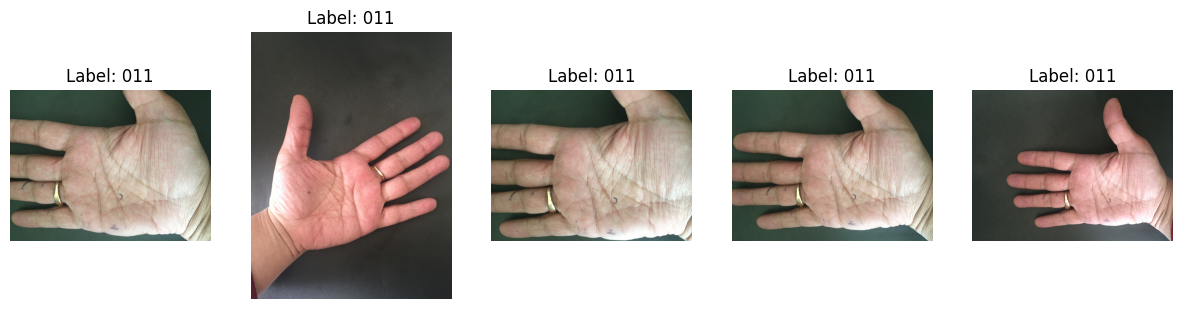

In [6]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

# --- CORRECTED PATH based on your `ls -R` output ---
# The parent folder of 001, 002, etc., is the one with the long name.
# You need to join 'BMPD_Dataset' with this long folder name.
data_dir = os.path.join('BMPD_Dataset', 'Birjand University Mobile Palmprint Database (BMPD)')

image_paths = []
labels = []

# Ensure the data_dir exists before proceeding
if not os.path.exists(data_dir):
    print(f"Error: The specified data directory '{data_dir}' does not exist. Please correct the path.")
else:
    # Iterate through all files in the data_dir and its subdirectories
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            # All your image files are .JPG, so let's explicitly check for that
            if file.lower().endswith('.jpg'):
                image_path = os.path.join(root, file)
                image_paths.append(image_path)

                # --- Labeling Logic ---
                # The label (subject ID) is the name of the immediate parent folder (e.g., '001', '002').
                # os.path.basename(root) will correctly extract '001', '002', etc.
                label = os.path.basename(root)
                labels.append(label)

    print(f"Found {len(image_paths)} images.")

    if len(image_paths) > 0:
        # Example: Load and display a few images
        num_images_to_show = min(5, len(image_paths))
        plt.figure(figsize=(15, 5))
        for i in range(num_images_to_show):
            img_path = image_paths[i]
            img = cv2.imread(img_path)
            if img is not None:
                # OpenCV loads images in BGR, matplotlib expects RGB
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                plt.subplot(1, num_images_to_show, i + 1)
                plt.imshow(img_rgb)
                plt.title(f"Label: {labels[i]}")
                plt.axis('off')
            else:
                print(f"Warning: Could not load image {img_path}")
        plt.show()
    else:
        print("No images found in the specified directory. Check file extensions or deeper nesting.")

# **Exploratory Data Analysis**

## **Dataset Structure & Image Basics**

### **Count images per subject (user/class)**

<ipython-input-7-477379460>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
<ipython-input-7-477379460>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)


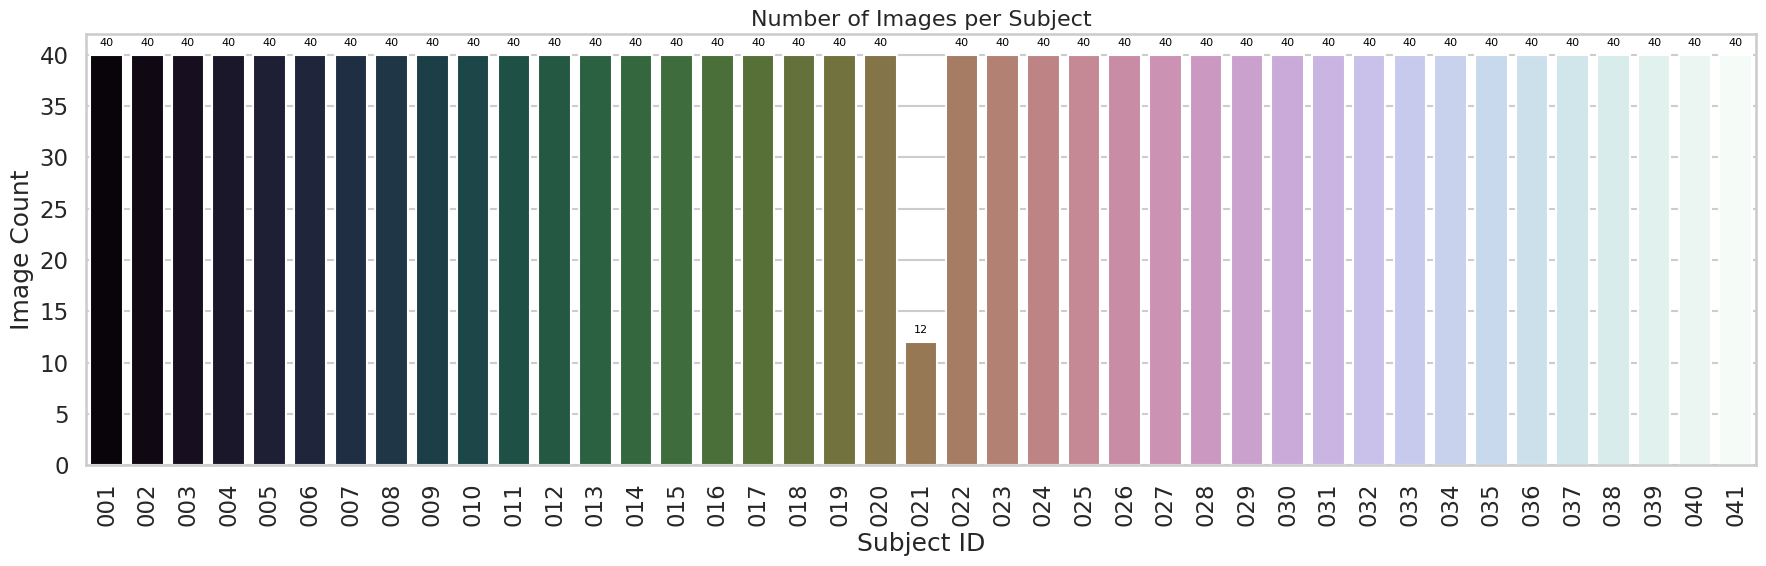

In [ ]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Style
sns.set(style="whitegrid", context="talk")

# Count labels
label_counts = Counter(labels)
df_labels = pd.DataFrame(label_counts.items(), columns=['Subject ID', 'Image Count']).sort_values('Subject ID')

# Plot
plt.figure(figsize=(18, 6))
barplot = sns.barplot(
    x='Subject ID',
    y='Image Count',
    data=df_labels,
    palette='cubehelix'
)

# Rotate x-labels and add value labels on top
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)
for p in barplot.patches:
    height = p.get_height()
    if height > 0:
        barplot.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5),
                         textcoords='offset points')

# Titles and labels
plt.title('Number of Images per Subject', fontsize=16)
plt.xlabel('Subject ID')
plt.ylabel('Image Count')
plt.tight_layout()
plt.show()

### **Plot distribution of image dimensions (width & height separately)**

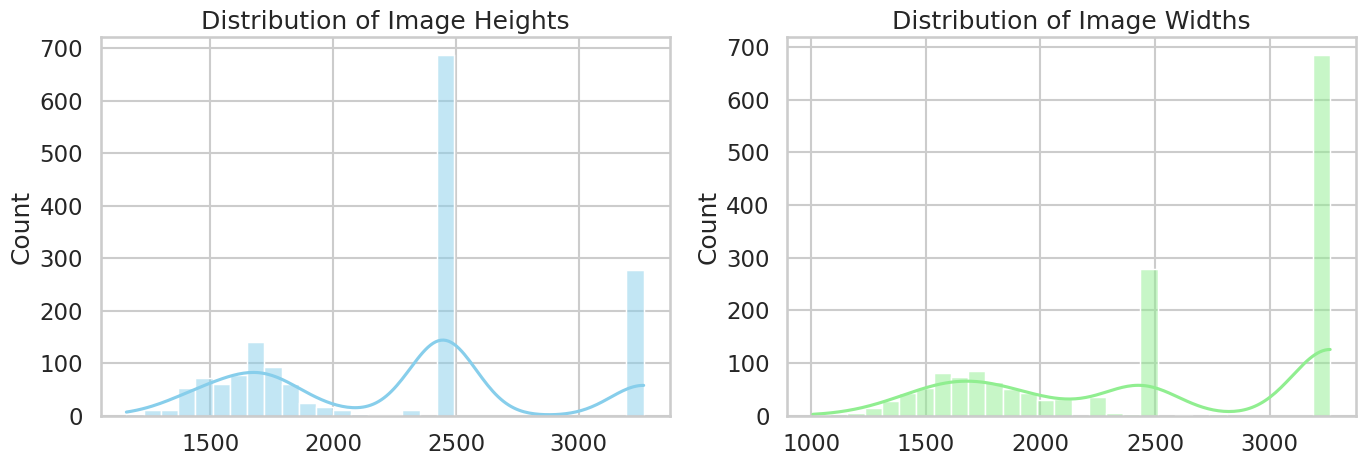

In [ ]:
image_shapes = [cv2.imread(path).shape[:2] for path in image_paths if cv2.imread(path) is not None]
heights, widths = zip(*image_shapes)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(heights, kde=True, bins=30, color='skyblue')
plt.title("Distribution of Image Heights")

plt.subplot(1, 2, 2)
sns.histplot(widths, kde=True, bins=30, color='lightgreen')
plt.title("Distribution of Image Widths")

plt.tight_layout()
plt.show()

### **Visualize a sample image grid per class**

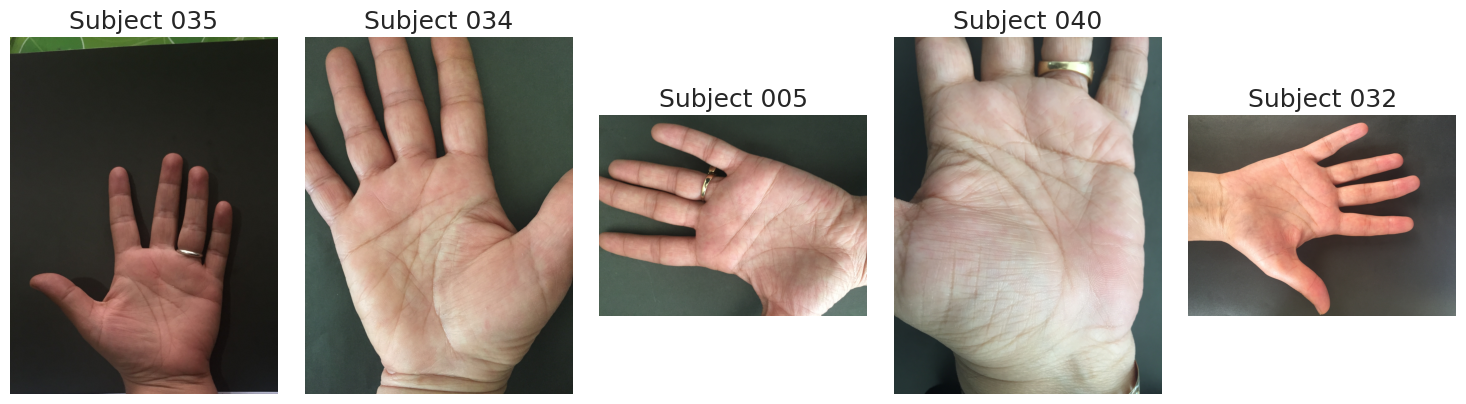

In [ ]:
import random

unique_labels = list(set(labels))
sample_labels = random.sample(unique_labels, 5)  # Pick 5 random classes
plt.figure(figsize=(15, 10))

for i, label in enumerate(sample_labels):
    sample_imgs = [p for p, l in zip(image_paths, labels) if l == label][:1]  # first image per label
    for img_path in sample_imgs:
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(f"Subject {label}")
        plt.axis('off')

plt.tight_layout()
plt.show()

### **Check for corrupted files**

In [ ]:
import cv2
import os

corrupted_files = []

for path in image_paths:
    img = cv2.imread(path)
    if img is None:
        corrupted_files.append(path)

# Report
if corrupted_files:
    print(f"Found {len(corrupted_files)} corrupted images:")
    for file in corrupted_files:
        print(file)
else:
    print("✅ No corrupted images found.")

✅ No corrupted images found.


### **Check folder structure programmatically**



In [ ]:
import os

# Set path to your extracted dataset
data_dir = os.path.join("BMPD_Dataset", "Birjand University Mobile Palmprint Database (BMPD)")

# Confirm the dataset path exists
if not os.path.exists(data_dir):
    raise FileNotFoundError(f" Dataset folder not found at: {data_dir}")

print(f"📁 Exploring folder structure under: {data_dir}\n")

# Walk through the directory and print folder contents
for root, dirs, files in os.walk(data_dir):
    indent_level = root.replace(data_dir, "").count(os.sep)
    indent = "    " * indent_level
    print(f"{indent} {os.path.basename(root)} — {len(files)} file(s)")

    for f in files[:5]:  # Show only first 5 files per folder to keep it readable
        print(f"{indent}     {f}")

    if len(files) > 5:
        print(f"{indent}    ... and {len(files)-5} more files\n")


📁 Exploring folder structure under: BMPD_Dataset/Birjand University Mobile Palmprint Database (BMPD)

 Birjand University Mobile Palmprint Database (BMPD) — 0 file(s)
     002 — 40 file(s)
         002_S_R_14.JPG
         002_S_L_29.JPG
         002_S_R_17.JPG
         002_F_L_33.JPG
         002_S_R_18.JPG
        ... and 35 more files

     038 — 40 file(s)
         038_S_R_19.JPG
         038_F_L_32.JPG
         038_F_L_38.JPG
         038_F_R_7.JPG
         038_S_L_24.JPG
        ... and 35 more files

     004 — 40 file(s)
         004_S_L_22.JPG
         004_S_L_21.JPG
         004_F_R_0.JPG
         004_S_R_17.JPG
         004_F_R_2.JPG
        ... and 35 more files

     034 — 40 file(s)
         034_S_R_18.JPG
         034_F_R_0.JPG
         034_S_R_13.JPG
         034_S_L_20.JPG
         034_F_R_8.JPG
        ... and 35 more files

     007 — 40 file(s)
         007_S_L_22.JPG
         007_F_R_3.JPG
         007_S_R_17.JPG
         007_F_R_9.JPG
         007_S_R_10.JPG
      

### **Get image shapes, sizes, and formats**

In [ ]:
import os
from PIL import Image

# Set the correct dataset directory
data_dir = os.path.join("BMPD_Dataset", "Birjand University Mobile Palmprint Database (BMPD)")

# Lists to collect metadata
image_shapes = []
image_formats = []
image_sizes = []
image_paths = []

print(f"📁 Scanning dataset at: {data_dir}\n")

# Walk through all user folders and collect metadata
for user_folder in os.listdir(data_dir):
    user_path = os.path.join(data_dir, user_folder)

    if os.path.isdir(user_path):
        print(f" Entering folder: {user_folder}")
        for img_file in os.listdir(user_path):
            if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(user_path, img_file)
                try:
                    with Image.open(img_path) as img:
                        image_shapes.append(img.size)  # (width, height)
                        image_formats.append(img.format)
                        image_sizes.append(os.path.getsize(img_path))  # size in bytes
                        image_paths.append(img_path)
                except Exception as e:
                    print(f" Error reading image: {img_path} — {e}")

print("\n Finished scanning all images.")
print(f"  Total images processed: {len(image_paths)}")
print(f"  Unique formats found: {set(image_formats)}")

# Print sample image info
print("\n Sample image metadata:")
for i in range(min(5, len(image_paths))):
    print(f"{i+1}. Path: {image_paths[i]}")
    print(f"   Shape (WxH): {image_shapes[i]}")
    print(f"   Format: {image_formats[i]}")
    print(f"   Size: {image_sizes[i] // 1024} KB")


📁 Scanning dataset at: BMPD_Dataset/Birjand University Mobile Palmprint Database (BMPD)

 Entering folder: 002
 Entering folder: 038
 Entering folder: 004
 Entering folder: 034
 Entering folder: 007
 Entering folder: 040
 Entering folder: 028
 Entering folder: 031
 Entering folder: 006
 Entering folder: 037
 Entering folder: 005
 Entering folder: 041
 Entering folder: 014
 Entering folder: 015
 Entering folder: 011
 Entering folder: 033
 Entering folder: 003
 Entering folder: 008
 Entering folder: 023
 Entering folder: 019
 Entering folder: 012
 Entering folder: 009
 Entering folder: 018
 Entering folder: 021
 Entering folder: 036
 Entering folder: 017
 Entering folder: 022
 Entering folder: 032
 Entering folder: 039
 Entering folder: 026
 Entering folder: 016
 Entering folder: 020
 Entering folder: 029
 Entering folder: 013
 Entering folder: 025
 Entering folder: 024
 Entering folder: 030
 Entering folder: 010
 Entering folder: 001
 Entering folder: 035
 Entering folder: 027

 Finishe

### **Plot distribution of image size**

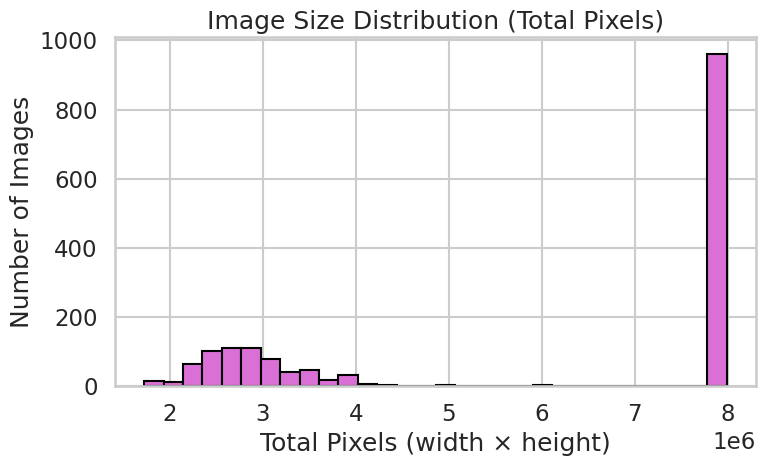

In [ ]:
import matplotlib.pyplot as plt

total_pixels = [w * h for (w, h) in image_shapes]

# Plot histogram of total pixel counts
plt.figure(figsize=(8, 5))
plt.hist(total_pixels, bins=30, color='orchid', edgecolor='black')
plt.title("Image Size Distribution (Total Pixels)")
plt.xlabel("Total Pixels (width × height)")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()

## **Image** **Quality** **&** **Intensity** **Analysis**

### **Pixel Intensity Histograms (RGB + Grayscale)**



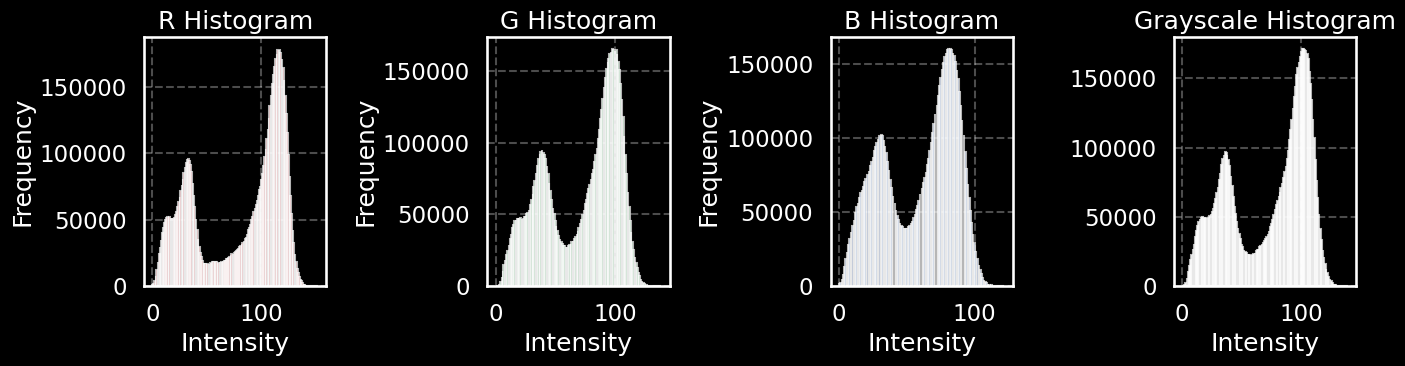

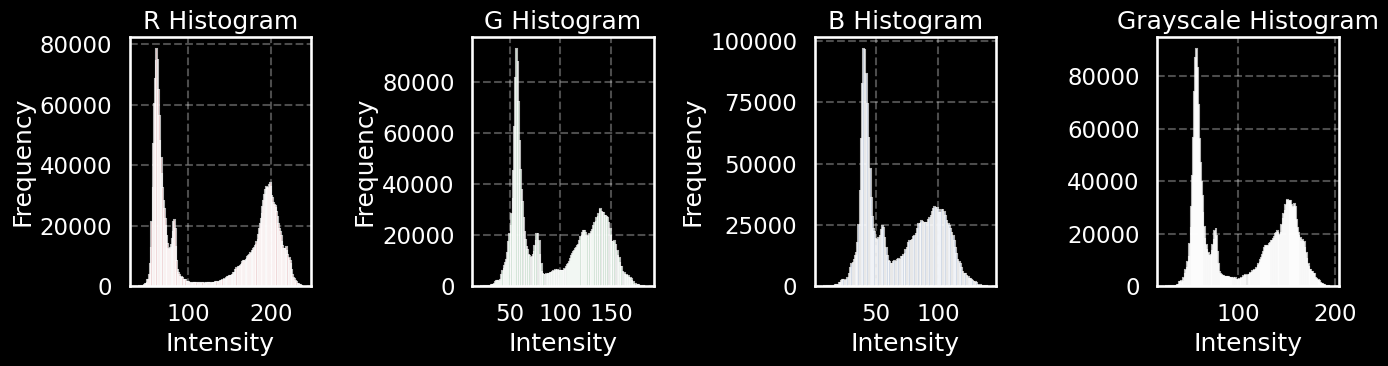

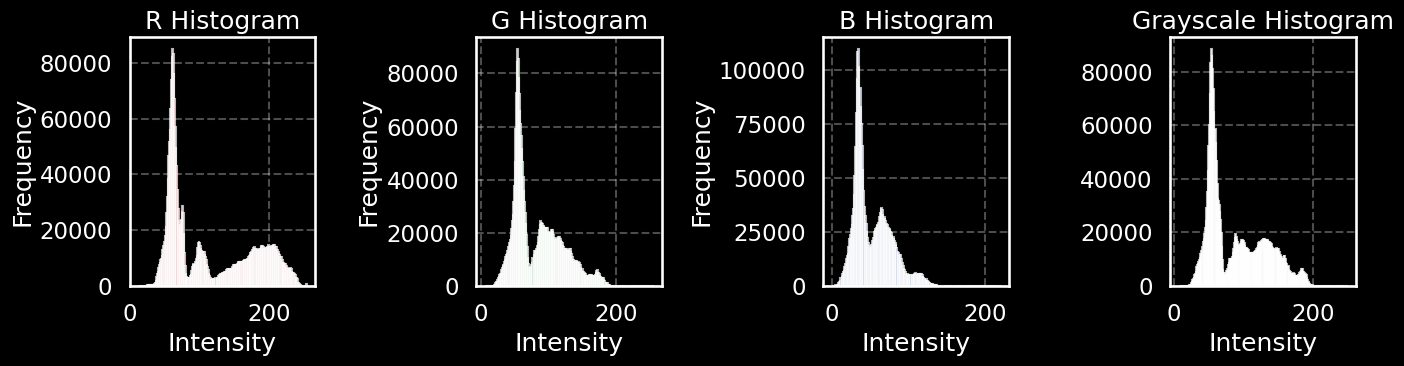

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.style as style

# Use a dark background style
style.use('dark_background')

sample_paths = random.sample(image_paths, 3)

for path in sample_paths:
    img = cv2.imread(path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    plt.figure(figsize=(14, 4))

    # RGB Histograms
    for i, color in enumerate(['r', 'g', 'b']):
        plt.subplot(1, 4, i+1)
        plt.hist(img_rgb[:, :, i].ravel(), bins=256, color=color, alpha=0.7)
        plt.title(f'{color.upper()} Histogram', color='white')
        plt.xlabel('Intensity', color='white')
        plt.ylabel('Frequency', color='white')
        plt.grid(True, linestyle='--', alpha=0.3)

    # Grayscale Histogram
    plt.subplot(1, 4, 4)
    plt.hist(img_gray.ravel(), bins=256, color='white', alpha=0.7)
    plt.title('Grayscale Histogram', color='white')
    plt.xlabel('Intensity', color='white')
    plt.grid(True, linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()

### **Brightness Statistics (Mean, Variance, etc.)**


In [ ]:
brightness_stats = []

for path in image_paths:
    img_gray = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img_gray is not None:
        mean_val = np.mean(img_gray)
        var_val = np.var(img_gray)
        brightness_stats.append((path, mean_val, var_val))

df_brightness = pd.DataFrame(brightness_stats, columns=["Path", "Mean Brightness", "Variance"])
df_brightness.head()

Path  Mean Brightness  \
0  BMPD_Dataset/Birjand University Mobile Palmpri...       128.721638   
1  BMPD_Dataset/Birjand University Mobile Palmpri...       133.601125   
2  BMPD_Dataset/Birjand University Mobile Palmpri...       121.644848   
3  BMPD_Dataset/Birjand University Mobile Palmpri...       127.922297   
4  BMPD_Dataset/Birjand University Mobile Palmpri...       121.430090   

      Variance  
0  3199.321473  
1  3314.106958  
2  3185.179903  
3  3383.610477  
4  3197.067369

### **Flag Overly Dark or Bright Images**



In [ ]:
# Thresholds can be adjusted
too_dark = df_brightness[df_brightness["Mean Brightness"] < 50]
too_bright = df_brightness[df_brightness["Mean Brightness"] > 163]

print(f"Too dark images: {len(too_dark)}")
print(f"Too bright images: {len(too_bright)}")

Too dark images: 10
Too bright images: 6


### **Blurriness Detection (Laplacian Variance)**

In [ ]:
def is_blurry(image, threshold=100.0):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    return laplacian_var < threshold, laplacian_var

blurry_images = []
for i, path in enumerate(image_paths):
    img = cv2.imread(path)
    if img is not None:
        blurry, score = is_blurry(img)
        if blurry:
            blurry_images.append((path, score))

print(f"Blurry images detected: {len(blurry_images)}")

Blurry images detected: 1560


### **Contrast Analysis (Standard Deviation of Pixel Intensities)**

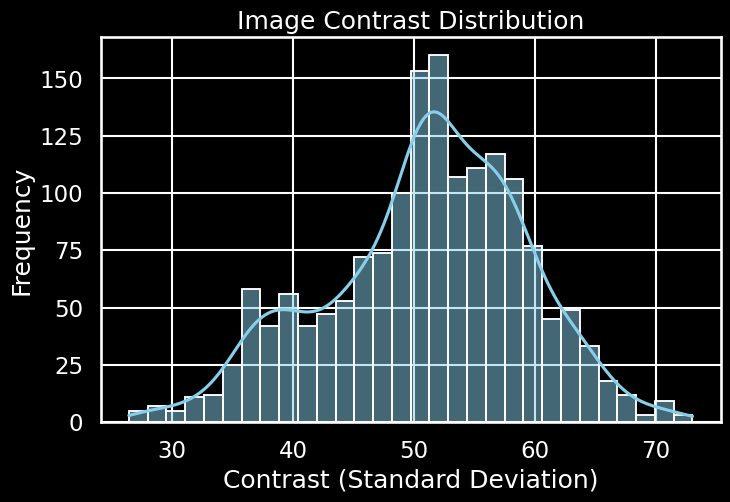

In [ ]:
def compute_contrast(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return np.std(gray)

contrast_scores = []
for path in image_paths:
    img = cv2.imread(path)
    if img is not None:
        contrast = compute_contrast(img)
        contrast_scores.append(contrast)

# Plotting contrast distribution
plt.figure(figsize=(8, 5))
sns.histplot(contrast_scores, bins=30, kde=True, color='skyblue')
plt.title('Image Contrast Distribution')
plt.xlabel('Contrast (Standard Deviation)')
plt.ylabel('Frequency')
plt.show()

### **Visualize a Few of Each**

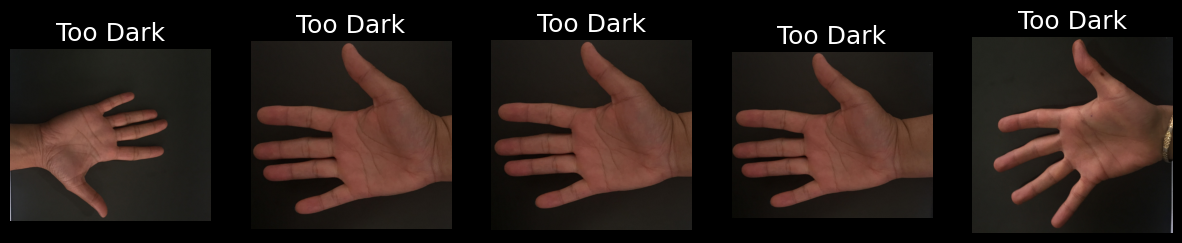

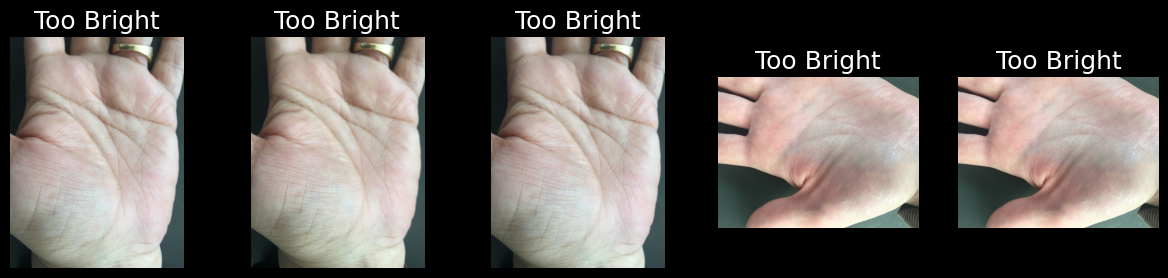

In [ ]:
def show_images(df, title, num=5):
    paths = df["Path"].head(num)
    plt.figure(figsize=(15, 3))
    for i, path in enumerate(paths):
        img = cv2.imread(path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num, i+1)
        plt.imshow(img_rgb)
        plt.title(title)
        plt.axis('off')
    plt.show()

show_images(too_dark, "Too Dark")
show_images(too_bright, "Too Bright")

### **Apply and visualize CLAHE on a few samples**

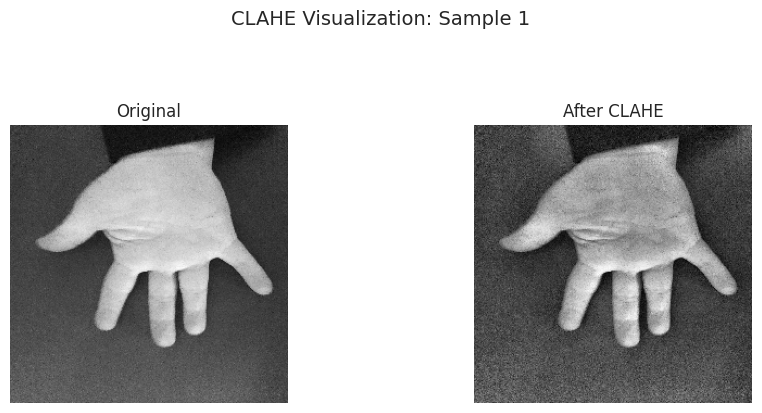

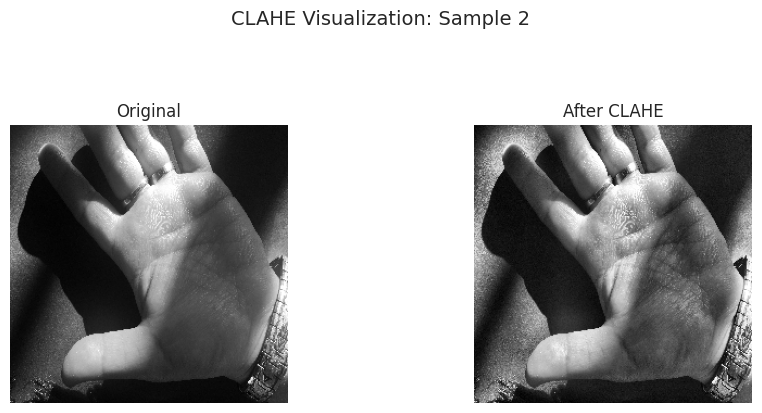

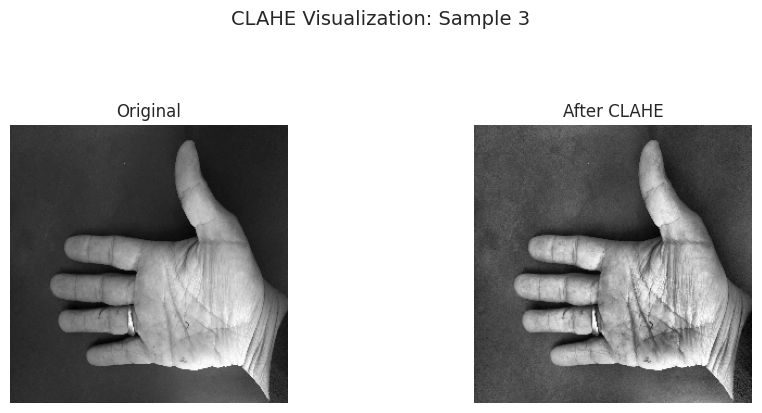

In [ ]:
import cv2
import matplotlib.pyplot as plt
import random

# Sample a few images
sample_paths = random.sample(image_paths, 3)
target_size = (256, 256)  # Set your desired display size

def apply_clahe(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(image)

for i, path in enumerate(sample_paths):
    original = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if original is None:
        print(f" Couldn't read: {path}")
        continue

    # Resize both original and CLAHE image to same size
    original_resized = cv2.resize(original, target_size)
    clahe_img = apply_clahe(original_resized)

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(original_resized, cmap='gray')
    plt.title("Original", fontsize=12)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(clahe_img, cmap='gray')
    plt.title("After CLAHE", fontsize=12)
    plt.axis('off')

    plt.suptitle(f"CLAHE Visualization: Sample {i+1}", fontsize=14, y=1.05)
    plt.tight_layout()
    plt.show()


### **Visualize Before/After CLAHE Side-by-Side**

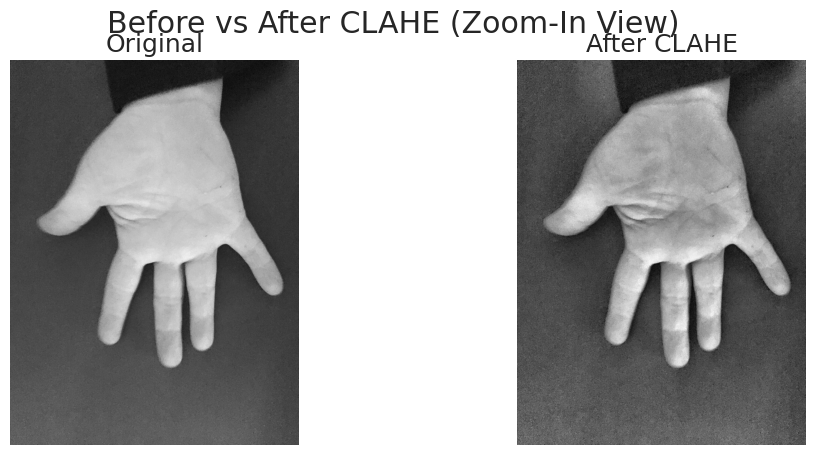

In [ ]:
# Pick one sample image to focus on
path = sample_paths[0]

original = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
clahe_img = apply_clahe(original)

# Side-by-side view
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(clahe_img, cmap='gray')
plt.title("After CLAHE")
plt.axis('off')

plt.suptitle("Before vs After CLAHE (Zoom-In View)")
plt.show()


### **Plot histogram comparison of raw vs CLAHE**

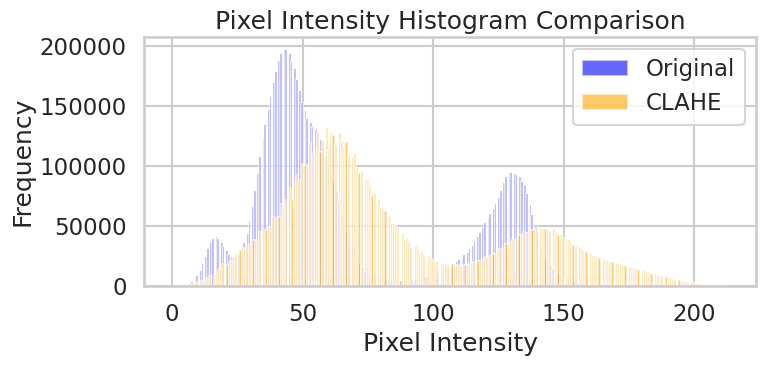

In [ ]:
plt.figure(figsize=(8, 4))

plt.hist(original.ravel(), bins=256, alpha=0.6, label="Original", color='blue')
plt.hist(clahe_img.ravel(), bins=256, alpha=0.6, label="CLAHE", color='orange')

plt.title("Pixel Intensity Histogram Comparison")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()


## **Intra Class Variation**

### **Pick 5 users and load their images**


Selected users: ['032', '040', '005', '038', '019']
User 032 → 40 images
User 040 → 40 images
User 005 → 40 images
User 038 → 40 images
User 019 → 40 images


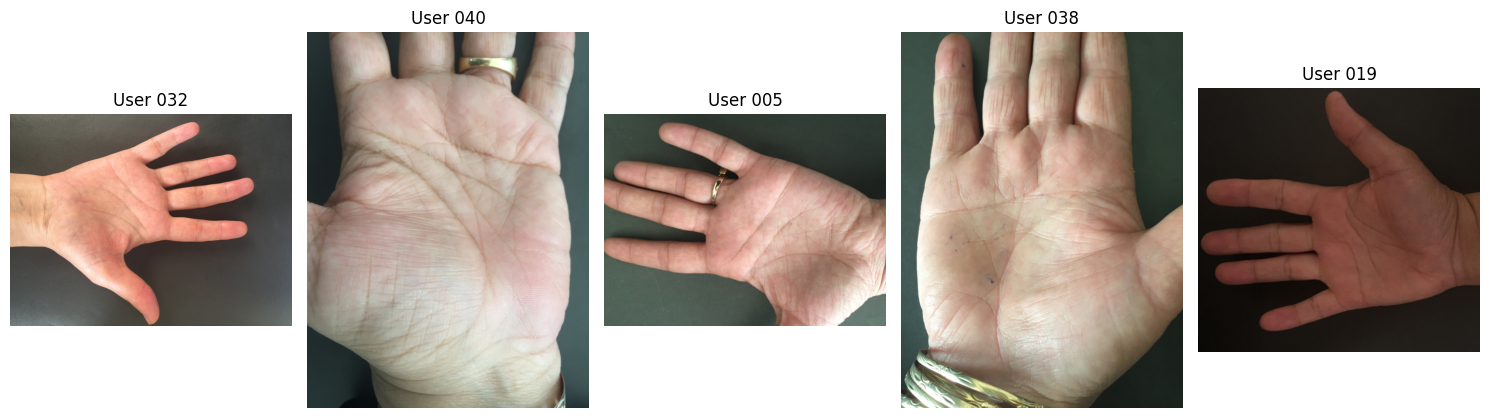

In [ ]:
import random
from collections import defaultdict

user_images = defaultdict(list)
for path, label in zip(image_paths, labels):
    user_images[label].append(path)

# Pick 5 users with enough images (e.g., ≥5)
users_sample = [user for user in user_images if len(user_images[user]) >= 5]
selected_users = random.sample(users_sample, 5)
print("Selected users:", selected_users)
for user in selected_users:
    print(f"User {user} → {len(user_images[user])} images")
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

for idx, user in enumerate(selected_users):
    img_path = user_images[user][0]  # Get the first image for that user
    img = cv2.imread(img_path)
    if img is not None:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 5, idx + 1)
        plt.imshow(img_rgb)
        plt.title(f'User {user}')
        plt.axis('off')
    else:
        print(f"Could not load image for user {user}")

plt.tight_layout()
plt.show()

### **Compare their own images (intra-user) using MSE/SSIM**


In [ ]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
import cv2
import numpy as np

resize_shape = (224, 224)

for user in selected_users:
    print(f"\nUser: {user}")
    img_paths = user_images[user][:5]
    imgs = []

    for path in img_paths:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img_resized = cv2.resize(img, resize_shape)
            imgs.append(img_resized)

    if len(imgs) < 5:
        print("  Skipping due to unreadable images.")
        continue

    for i in range(len(imgs)):
        for j in range(i + 1, len(imgs)):
            score_ssim = ssim(imgs[i], imgs[j])
            score_mse = mse(imgs[i], imgs[j])
            print(f"  Img {i+1} vs Img {j+1} → SSIM: {score_ssim:.4f}, MSE: {score_mse:.2f}")


User: 032
  Img 1 vs Img 2 → SSIM: 0.5487, MSE: 1470.97
  Img 1 vs Img 3 → SSIM: 0.3880, MSE: 4441.04
  Img 1 vs Img 4 → SSIM: 0.3716, MSE: 5263.13
  Img 1 vs Img 5 → SSIM: 0.3533, MSE: 4921.05
  Img 2 vs Img 3 → SSIM: 0.3905, MSE: 4551.46
  Img 2 vs Img 4 → SSIM: 0.3848, MSE: 5070.42
  Img 2 vs Img 5 → SSIM: 0.3379, MSE: 5322.23
  Img 3 vs Img 4 → SSIM: 0.4654, MSE: 1888.54
  Img 3 vs Img 5 → SSIM: 0.2987, MSE: 6179.47
  Img 4 vs Img 5 → SSIM: 0.3229, MSE: 5891.21

User: 040
  Img 1 vs Img 2 → SSIM: 0.4639, MSE: 1026.22
  Img 1 vs Img 3 → SSIM: 0.3968, MSE: 2126.34
  Img 1 vs Img 4 → SSIM: 0.3632, MSE: 6465.19
  Img 1 vs Img 5 → SSIM: 0.3117, MSE: 5003.66
  Img 2 vs Img 3 → SSIM: 0.5388, MSE: 1270.17
  Img 2 vs Img 4 → SSIM: 0.3586, MSE: 6558.85
  Img 2 vs Img 5 → SSIM: 0.3120, MSE: 5510.85
  Img 3 vs Img 4 → SSIM: 0.3364, MSE: 6838.75
  Img 3 vs Img 5 → SSIM: 0.2826, MSE: 5947.68
  Img 4 vs Img 5 → SSIM: 0.4330, MSE: 5523.32

User: 005
  Img 1 vs Img 2 → SSIM: 0.2992, MSE: 5249.55
 

**Quick Observations**

User 019 shows strong internal consistency (SSIM mostly > 0.5), suggesting the images are quite similar.

User 005 shows a lot of variation, especially between Img 1 and others (SSIM ~0.29–0.31, MSE > 5000).

User 032 and User 040 have moderate SSIMs (~0.35–0.55), indicating some image variance, which might be useful in clustering or anomaly detection.

### **Inta User Image Similarity Summary**


<ipython-input-20-4170034989>:46: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  extremes = df.groupby("user").apply(



📊 Summary Table:
  user  avg_ssim      avg_mse  max_ssim        max_pair  min_ssim  \
0  005  0.397886  4677.301319  0.639191  Img 2 vs Img 3  0.287615   
1  019  0.534434  1531.452192  0.695197  Img 2 vs Img 4  0.473062   
2  032  0.386173  4499.952300  0.548669  Img 1 vs Img 2  0.298670   
3  038  0.369140  4177.707278  0.492523  Img 2 vs Img 5  0.304388   
4  040  0.379699  4627.101220  0.538789  Img 2 vs Img 3  0.282599   

         min_pair  
0  Img 1 vs Img 5  
1  Img 3 vs Img 4  
2  Img 3 vs Img 5  
3  Img 1 vs Img 4  
4  Img 3 vs Img 5  


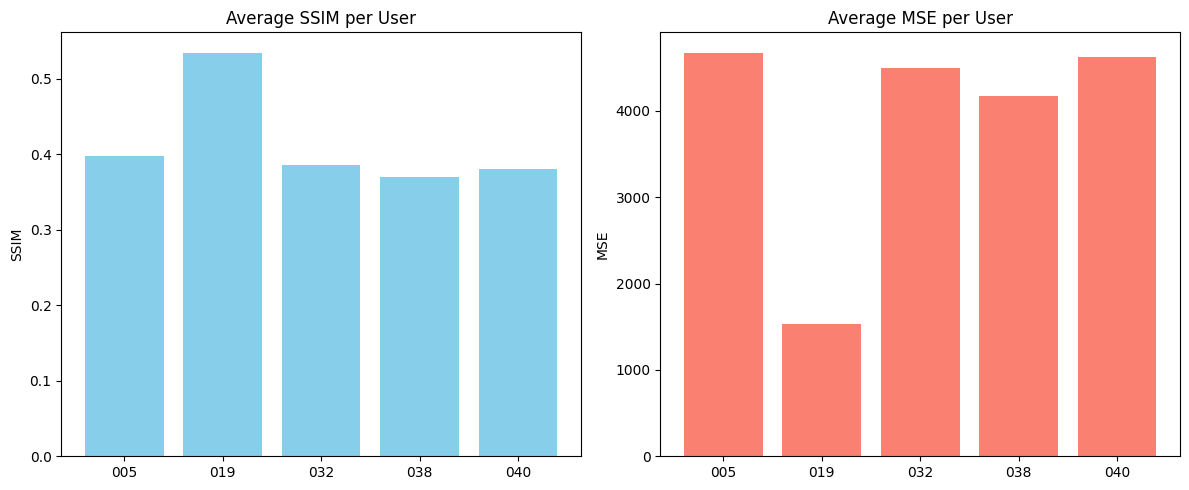

In [ ]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

resize_shape = (224, 224)
results = []

for user in selected_users:
    img_paths = user_images[user][:5]
    imgs = []

    for path in img_paths:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img_resized = cv2.resize(img, resize_shape)
            imgs.append(img_resized)

    if len(imgs) < 5:
        print("  Skipping due to unreadable images.")
        continue

    for i in range(len(imgs)):
        for j in range(i + 1, len(imgs)):
            score_ssim = ssim(imgs[i], imgs[j])
            score_mse = mse(imgs[i], imgs[j])
            results.append({
                'user': user,
                'pair': f"Img {i+1} vs Img {j+1}",
                'ssim': score_ssim,
                'mse': score_mse
            })


# Convert results to DataFrame
df = pd.DataFrame(results)

# Grouped summary
summary = df.groupby("user").agg(
    avg_ssim=("ssim", "mean"),
    avg_mse=("mse", "mean")
).reset_index()

extremes = df.groupby("user").apply(
    lambda sub: pd.Series({
        "max_ssim": sub["ssim"].max(),
        "max_pair": sub.loc[sub["ssim"].idxmax()]["pair"],
        "min_ssim": sub["ssim"].min(),
        "min_pair": sub.loc[sub["ssim"].idxmin()]["pair"]
    })
).reset_index()

final_summary = pd.merge(summary, extremes, on="user")

# Show summary
print("\n📊 Summary Table:")
print(final_summary)

# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(final_summary["user"], final_summary["avg_ssim"], color="skyblue")
plt.title("Average SSIM per User")
plt.ylabel("SSIM")

plt.subplot(1, 2, 2)
plt.bar(final_summary["user"], final_summary["avg_mse"], color="salmon")
plt.title("Average MSE per User")
plt.ylabel("MSE")

plt.tight_layout()
plt.show()

### **PCA and t-SNE visualization**

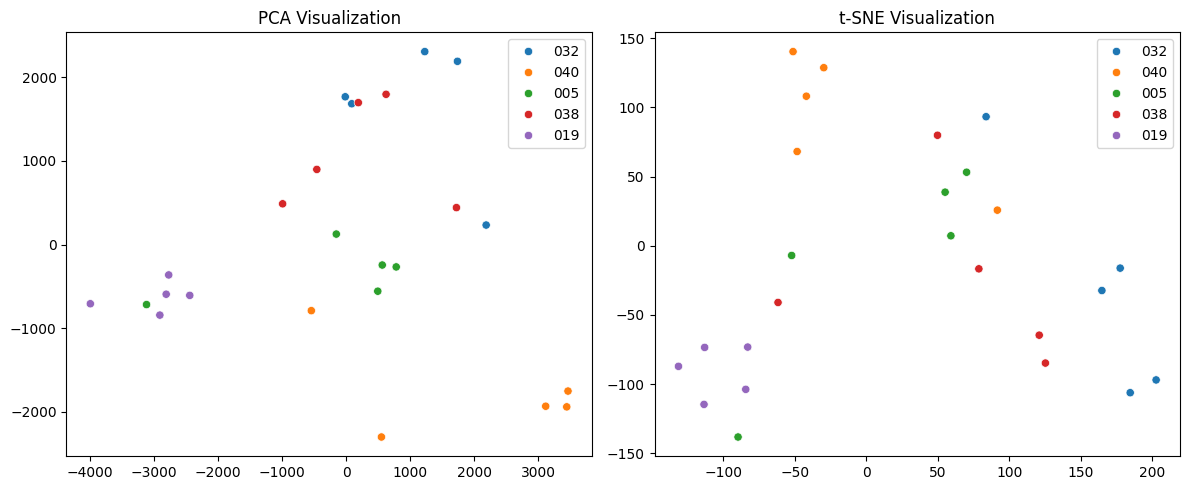

In [ ]:
# Flatten and collect sample images for visualization
flattened_imgs = []
img_labels = []

for user in selected_users:
    for img_path in user_images[user][:5]:
        img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(img, (64, 64))  # ensure uniformity
        flattened_imgs.append(resized.flatten())
        img_labels.append(user)

X = np.array(flattened_imgs)

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
tsne_result = tsne.fit_transform(X)

# Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=img_labels)
plt.title("PCA Visualization")

plt.subplot(1, 2, 2)
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=img_labels)
plt.title("t-SNE Visualization")

plt.tight_layout()
plt.show()

## **Inter Class Variation**

### **Load One Image per User**

Loaded 10 images from 10 users.


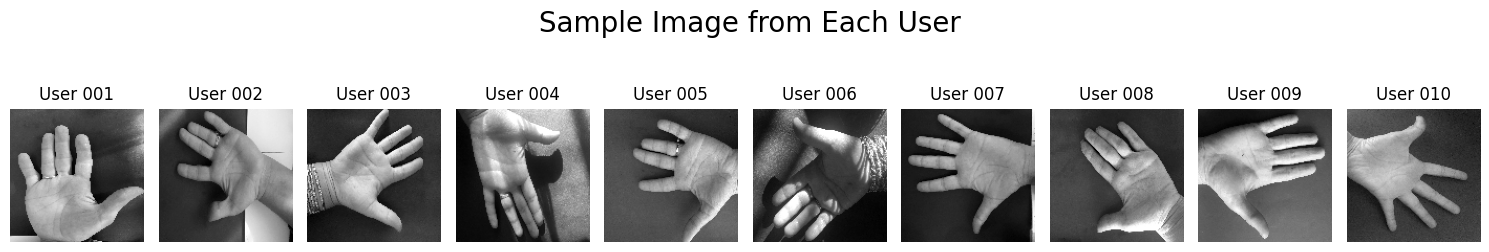

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error as mse
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import random
from PIL import Image
import seaborn as sns

# Define dataset path (adjust if needed)
data_dir = os.path.join("BMPD_Dataset", "Birjand University Mobile Palmprint Database (BMPD)")
image_vectors = []
labels = []
user_ids = sorted(os.listdir(data_dir))[:10]  # Pick 10 users for variety

for user_id in user_ids:
    user_path = os.path.join(data_dir, user_id)
    if os.path.isdir(user_path):
        # Pick one random image per user
        img_name = random.choice([
            f for f in os.listdir(user_path) if f.lower().endswith(('.jpg', '.png'))
        ])
        img_path = os.path.join(user_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (128, 128))  # Resize for uniformity
        image_vectors.append(img.flatten())
        labels.append(user_id)

print(f"Loaded {len(image_vectors)} images from {len(labels)} users.")
plt.figure(figsize=(15, 3))

for i, (user, img) in enumerate(images.items()):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'User {user}')
    plt.axis('off')

plt.suptitle(" Sample Image from Each User", fontsize=20)
plt.tight_layout()
plt.show()



### **Compute SSIM and MSE Matrices**

In [ ]:
import numpy as np
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error as mse

n = len(images)
users = list(images.keys())
ssim_matrix = np.zeros((n, n))
mse_matrix = np.zeros((n, n))

# Compute SSIM and MSE
for i in range(n):
    for j in range(n):
        img1 = images[users[i]]
        img2 = images[users[j]]
        ssim_matrix[i, j] = ssim(img1, img2)
        mse_matrix[i, j] = mse(img1, img2)

print("SSIM and MSE matrices computed.\n")
print(" Pairwise SSIM and MSE Values:\n")

for i in range(n):
    for j in range(i + 1, n):  # Avoid repeat pairs
        print(f" {users[i]} vs {users[j]} ➤ SSIM: {ssim_matrix[i, j]:.4f} | MSE: {mse_matrix[i, j]:.2f}")


SSIM and MSE matrices computed.

 Pairwise SSIM and MSE Values:

 001 vs 002 ➤ SSIM: 0.2157 | MSE: 7550.99
 001 vs 003 ➤ SSIM: 0.2307 | MSE: 5072.02
 001 vs 004 ➤ SSIM: 0.1310 | MSE: 7793.63
 001 vs 005 ➤ SSIM: 0.2785 | MSE: 5557.10
 001 vs 006 ➤ SSIM: 0.1605 | MSE: 7073.40
 001 vs 007 ➤ SSIM: 0.2425 | MSE: 7288.66
 001 vs 008 ➤ SSIM: 0.2719 | MSE: 5688.05
 001 vs 009 ➤ SSIM: 0.2271 | MSE: 3937.71
 001 vs 010 ➤ SSIM: 0.2819 | MSE: 4659.82
 002 vs 003 ➤ SSIM: 0.2507 | MSE: 7318.95
 002 vs 004 ➤ SSIM: 0.1675 | MSE: 5773.93
 002 vs 005 ➤ SSIM: 0.2826 | MSE: 5196.75
 002 vs 006 ➤ SSIM: 0.0928 | MSE: 9341.61
 002 vs 007 ➤ SSIM: 0.2795 | MSE: 7479.72
 002 vs 008 ➤ SSIM: 0.2966 | MSE: 6085.69
 002 vs 009 ➤ SSIM: 0.2504 | MSE: 5983.94
 002 vs 010 ➤ SSIM: 0.2563 | MSE: 7812.29
 003 vs 004 ➤ SSIM: 0.1569 | MSE: 6761.66
 003 vs 005 ➤ SSIM: 0.2927 | MSE: 4482.38
 003 vs 006 ➤ SSIM: 0.1537 | MSE: 6977.92
 003 vs 007 ➤ SSIM: 0.3023 | MSE: 4810.87
 003 vs 008 ➤ SSIM: 0.2506 | MSE: 5280.80
 003 vs 009

### **Visualize with Heatmaps**

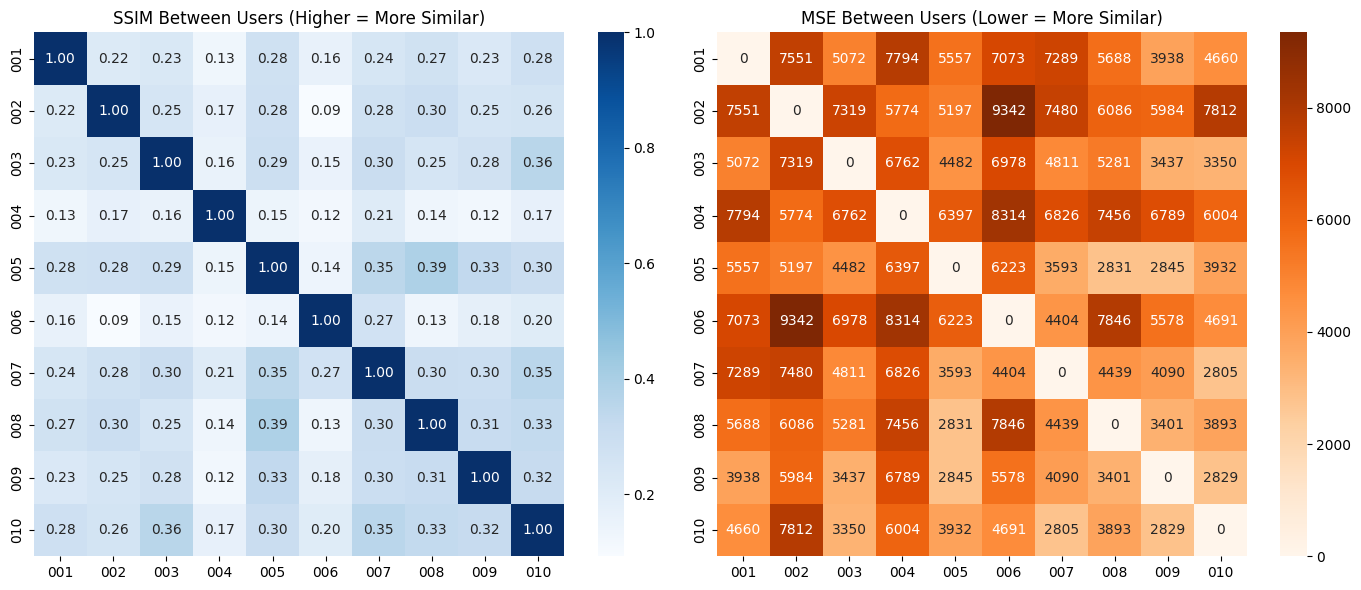

In [ ]:
plt.figure(figsize=(14, 6))

# SSIM Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(ssim_matrix, xticklabels=users, yticklabels=users, cmap='Blues', annot=True, fmt=".2f")
plt.title("SSIM Between Users (Higher = More Similar)")

# MSE Heatmap
plt.subplot(1, 2, 2)
sns.heatmap(mse_matrix, xticklabels=users, yticklabels=users, cmap='Oranges', annot=True, fmt=".0f")
plt.title("MSE Between Users (Lower = More Similar)")

plt.tight_layout()
plt.show()


### **Labelled PCA/t-SNE points**

#### **Flatten images & collect labels**

In [ ]:
import numpy as np

image_vectors = []
user_labels = []

for user_id, img in images.items():
    image_vectors.append(img.flatten())
    user_labels.append(user_id)

X = np.array(image_vectors)
print(f" Image vectors shape (samples × features): {X.shape}")
print(f" Labels: {user_labels}")



 Image vectors shape (samples × features): (10, 16384)
 Labels: ['001', '002', '003', '004', '005', '006', '007', '008', '009', '010']


#### **Standardize Features**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f" Data standardized: mean={np.mean(X_scaled):.2f}, std={np.std(X_scaled):.2f}")


 Data standardized: mean=0.00, std=1.00


#### **Apply PCA**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Print explained variance
print("PCA Explained Variance Ratio:")
print(f" - PC1: {pca.explained_variance_ratio_[0]:.4f}")
print(f" - PC2: {pca.explained_variance_ratio_[1]:.4f}")


PCA Explained Variance Ratio:
 - PC1: 0.7427
 - PC2: 0.1799


#### **PCA Plot (with Labels)**





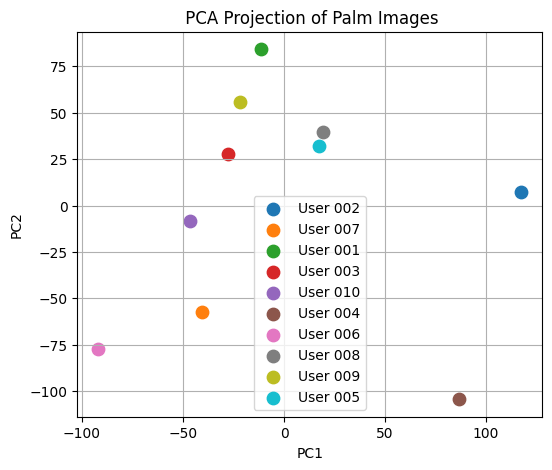

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
for uid in set(user_labels):
    idx = [i for i, l in enumerate(user_labels) if l == uid]
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=f'User {uid}', s=80)
plt.title(" PCA Projection of Palm Images")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


#### **Apply t-SNE**

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=5, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

print(f" t-SNE shape: {X_tsne.shape}")


 t-SNE shape: (10, 2)


####**t-SNE Plot (with Labels)**


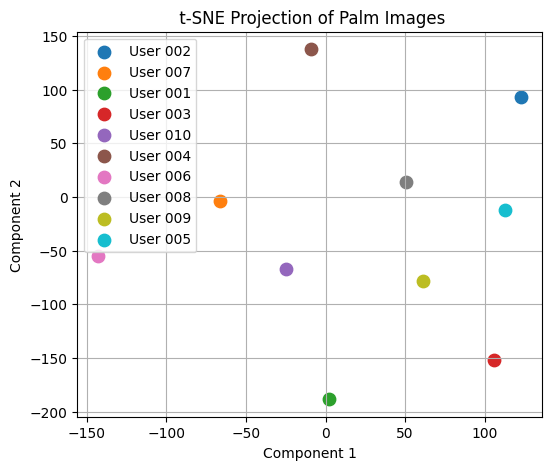

In [ ]:
plt.figure(figsize=(6, 5))
for uid in set(user_labels):
    idx = [i for i, l in enumerate(user_labels) if l == uid]
    plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1], label=f'User {uid}', s=80)
plt.title(" t-SNE Projection of Palm Images")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.grid(True)
plt.show()


## **Hand-Crafted Features & Stats**

### **Extract Gabor Filter Responses**

User 002 → Gabor Features: [247.6  251.84 246.36 244.3 ]
User 038 → Gabor Features: [250.28 247.09 240.55 250.14]
User 004 → Gabor Features: [225.37 248.08 243.69 237.03]
User 034 → Gabor Features: [245.27 245.63 247.6  250.07]
User 007 → Gabor Features: [240.48 245.06 234.9  242.41]


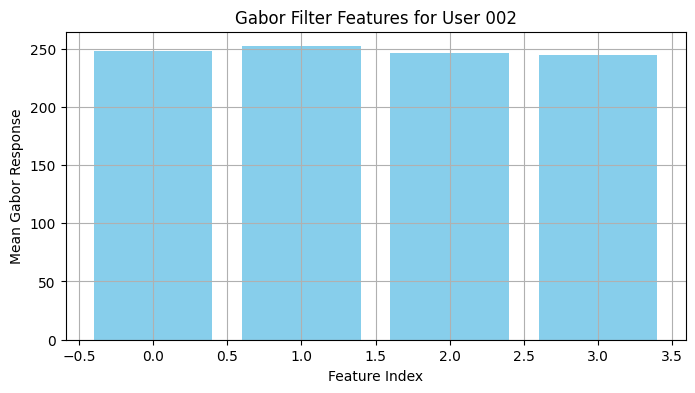

In [ ]:
import os

# Set the correct root directory
dataset_root = 'BMPD_Dataset/Birjand University Mobile Palmprint Database (BMPD)'

# Dictionary to hold user ID → list of image paths
user_images = {}

for user_id in os.listdir(dataset_root):
    user_folder = os.path.join(dataset_root, user_id)
    if os.path.isdir(user_folder):
        image_files = [
            os.path.join(user_folder, f)
            for f in os.listdir(user_folder)
            if f.lower().endswith(('.jpg', '.jpeg', '.png'))
        ]
        user_images[user_id] = sorted(image_files)  # sort to ensure consistent order
import cv2
import numpy as np

def apply_gabor_filters(img, ksize=31):
    responses = []
    for theta in np.arange(0, np.pi, np.pi / 4):
        kernel = cv2.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
        filtered = cv2.filter2D(img, cv2.CV_8UC3, kernel)
        responses.append(filtered.mean())  # mean response as a feature
    return responses

gabor_features = {}

for user, paths in user_images.items():
    feats = []
    for path in paths[:5]:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img = cv2.resize(img, (224, 224))
        feats.append(apply_gabor_filters(img))
    gabor_features[user] = np.mean(feats, axis=0) if feats else [0]*4
# Print a few results to confirm it's working
for user, feats in list(gabor_features.items())[:5]:  # show first 5 users
    print(f"User {user} → Gabor Features: {np.round(feats, 2)}")
import matplotlib.pyplot as plt

# Choose a sample user
sample_user = list(gabor_features.keys())[0]
features = gabor_features[sample_user]

plt.figure(figsize=(8, 4))
plt.bar(range(len(features)), features, color='skyblue')
plt.title(f'Gabor Filter Features for User {sample_user}')
plt.xlabel('Feature Index')
plt.ylabel('Mean Gabor Response')
plt.grid(True)
plt.show()

### **Shape-Based Feature (Zernike Moments using mahotas)**

User 002 → Zernike (first 5): [0.32 0.03 0.15 0.05 0.04]
User 038 → Zernike (first 5): [0.32 0.02 0.28 0.15 0.06]
User 004 → Zernike (first 5): [0.32 0.05 0.04 0.06 0.07]


<ipython-input-30-2323357942>:38: UserWarning: Mismatched number of handles and labels: len(handles) = 9 len(labels) = 41
  plt.legend(handles=scatter.legend_elements()[0], labels=user_ids, title="User ID", bbox_to_anchor=(1.05, 1), loc='upper left')


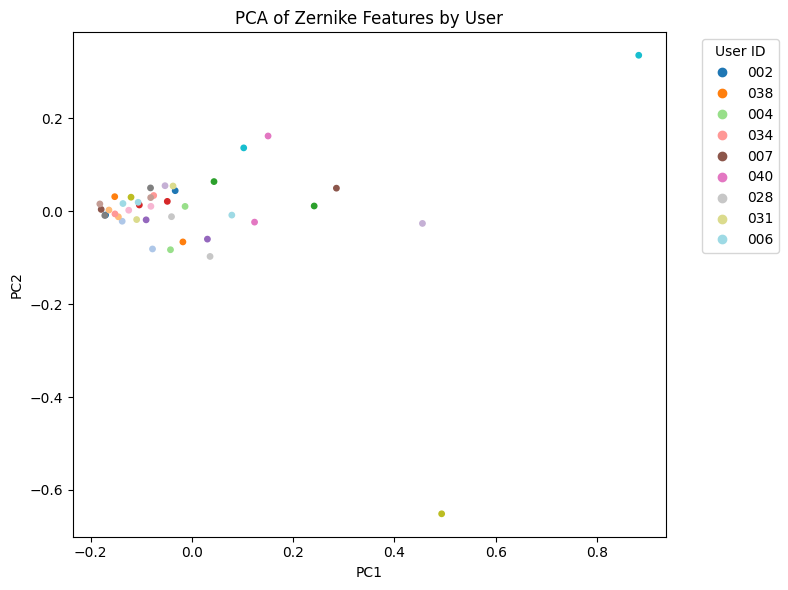

In [ ]:
!pip install mahotas

import mahotas
zernike_features = {}

for user, paths in user_images.items():
    feats = []
    for path in paths[:5]:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is None: continue
        img = cv2.resize(img, (224, 224))
        _, thresh = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
        moments = mahotas.features.zernike_moments(thresh, radius=100)
        feats.append(moments)
    zernike_features[user] = np.mean(feats, axis=0) if feats else [0]*25  # Default size = 25+

# Print sample
for user, feats in list(zernike_features.items())[:3]:
    print(f"User {user} → Zernike (first 5): {np.round(feats[:5], 2)}")

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Assume `zernike_features` is a dict: user_id → feature vector
user_ids = list(zernike_features.keys())
feature_matrix = np.array(list(zernike_features.values()))

# Apply PCA
pca = PCA(n_components=2)
components = pca.fit_transform(feature_matrix)

# Plot with color by user ID
plt.figure(figsize=(8, 6))
scatter = plt.scatter(components[:, 0], components[:, 1], c=range(len(user_ids)), cmap='tab20', s=15)

# Create legend
plt.legend(handles=scatter.legend_elements()[0], labels=user_ids, title="User ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Zernike Features by User")
plt.tight_layout()
plt.show()

### **Correlate Features with User IDs**

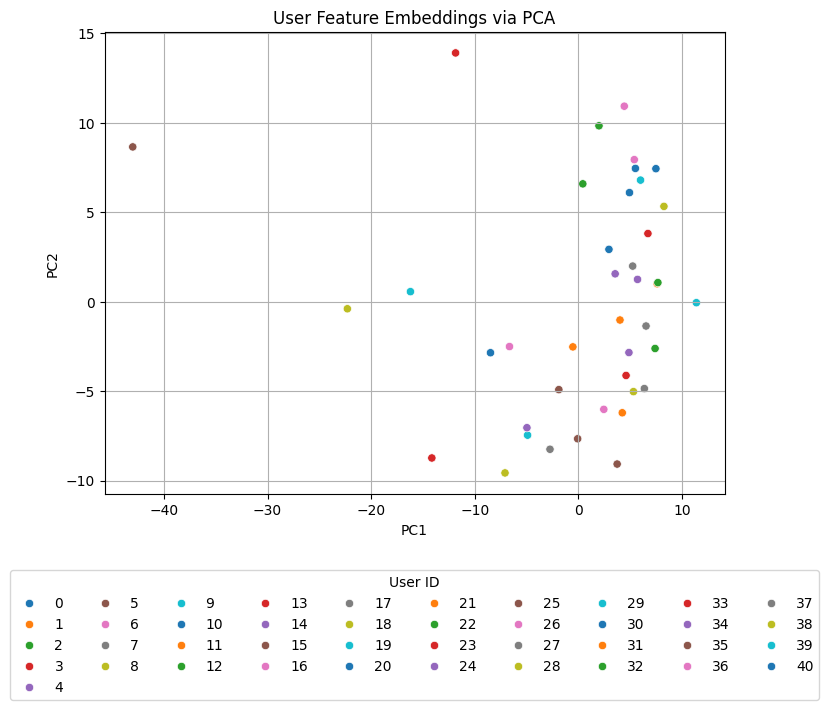

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns

# Combine Gabor + Zernike
all_users = sorted(list(set(gabor_features.keys()) & set(zernike_features.keys())))
X = [np.concatenate([gabor_features[u], zernike_features[u]]) for u in all_users]
y = [u for u in all_users]

# Encode user IDs
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# PCA to reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df["User"] = y_encoded

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="User", palette="tab10")
plt.legend(title="User ID", bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=10)
plt.title("User Feature Embeddings via PCA")
plt.grid(True)
plt.show()

### **Extract Local Binary Patterns (LBP)**

 Extracting LBP features and visualizing a few images...


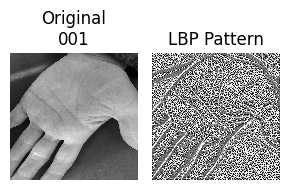

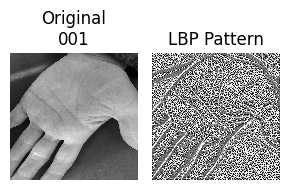

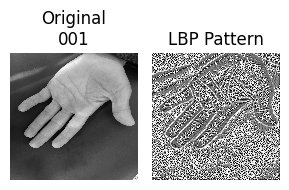

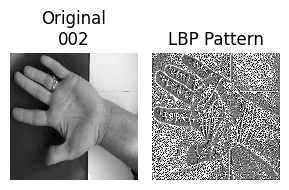

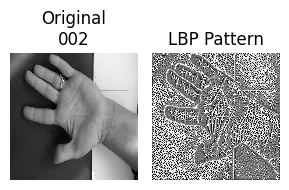

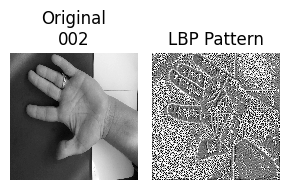

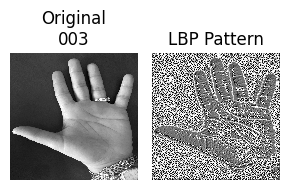

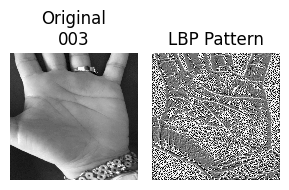

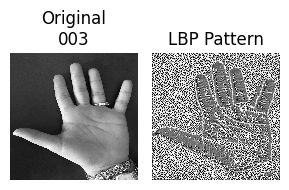

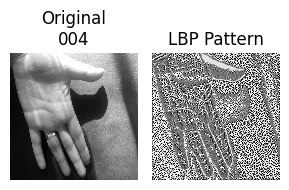

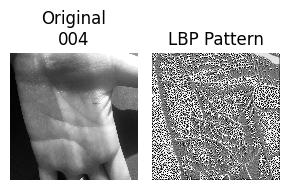

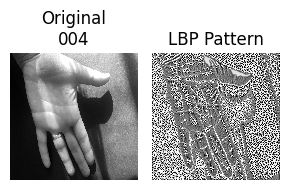

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import random

# Dataset path
data_dir = os.path.join("BMPD_Dataset", "Birjand University Mobile Palmprint Database (BMPD)")

radius = 1
n_points = 8 * radius
X_features = []
y_labels = []

print(" Extracting LBP features and visualizing a few images...")

user_ids = sorted(os.listdir(data_dir))[:4]  # Fewer users for clarity

for user in user_ids:
    user_path = os.path.join(data_dir, user)
    if os.path.isdir(user_path):
        img_files = sorted([
            f for f in os.listdir(user_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))
        ])[:3]  # 3 images per user for speed

        for img_file in img_files:
            img_path = os.path.join(user_path, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (128, 128))

            # LBP
            lbp = local_binary_pattern(img, n_points, radius, method='uniform')
            hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), density=True)

            X_features.append(hist)
            y_labels.append(user)

            # Show original + LBP
            plt.figure(figsize=(3, 3))
            plt.subplot(1, 2, 1)
            plt.imshow(img, cmap='gray')
            plt.title(f"Original\n{user}")
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(lbp, cmap='gray')
            plt.title("LBP Pattern")
            plt.axis('off')
            plt.tight_layout()
            plt.show()


### **Visualize LBP Feature Distributions**

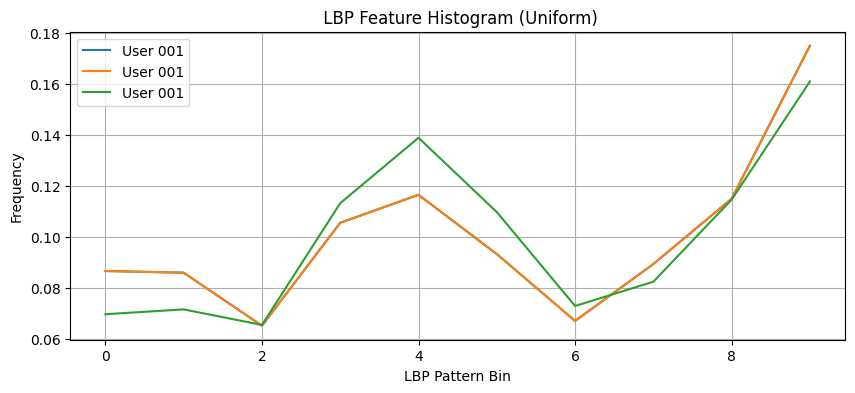

In [ ]:
# Plot LBP histograms for 3 random samples
plt.figure(figsize=(10, 4))
for i in range(3):
    plt.plot(X_features[i], label=f"User {y_labels[i]}")
plt.title(" LBP Feature Histogram (Uniform)")
plt.xlabel("LBP Pattern Bin")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


### **Show LBP Feature Table**

In [ ]:
import pandas as pd

df = pd.DataFrame(X_features)
df['User'] = y_labels
print(" Sample LBP Feature Table:")
print(df.head())


 Sample LBP Feature Table:
          0         1         2         3         4         5         6  \
0  0.086670  0.085999  0.065186  0.105591  0.116577  0.093323  0.067078   
1  0.086670  0.085999  0.065186  0.105591  0.116577  0.093323  0.067078   
2  0.069702  0.071594  0.065491  0.113281  0.138977  0.109802  0.072937   
3  0.054749  0.062683  0.060974  0.133240  0.162903  0.138306  0.077026   
4  0.057739  0.064331  0.056946  0.131104  0.162598  0.131042  0.077148   

          7         8         9 User  
0  0.089417  0.115051  0.175110  001  
1  0.089417  0.115051  0.175110  001  
2  0.082458  0.114685  0.161072  001  
3  0.078308  0.097534  0.134277  002  
4  0.082520  0.098022  0.138550  002  


### **Train KNN Classifier & Evaluate**

In [ ]:
# Prepare features and labels
X = np.array(X_features)
y = np.array(y_labels)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# KNN Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Metrics
print("Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Classification Report:

              precision    recall  f1-score   support

         001       0.50      1.00      0.67         1
         002       1.00      1.00      1.00         1
         003       0.00      0.00      0.00         1
         004       1.00      1.00      1.00         1

    accuracy                           0.75         4
   macro avg       0.62      0.75      0.67         4
weighted avg       0.62      0.75      0.67         4

Accuracy: 0.75


## **Augmentation Feasibility Check**

In [7]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as compare_ssim
import matplotlib.pyplot as plt

### **Augmentation Functions: Rotation, Brightness, Zoom**

In [8]:
def rotate_image(img, angle):
    h, w = img.shape
    M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1)
    return cv2.warpAffine(img, M, (w, h))

def adjust_brightness(img, factor):
    bright = cv2.convertScaleAbs(img, alpha=factor, beta=0)
    return bright

def zoom_image(img, zoom_factor):
    h, w = img.shape
    center_x, center_y = w//2, h//2
    radius_x, radius_y = int(w/(2*zoom_factor)), int(h/(2*zoom_factor))
    cropped = img[center_y-radius_y:center_y+radius_y, center_x-radius_x:center_x+radius_x]
    return cv2.resize(cropped, (w, h))

### **Choose a sample image from any user**

✅ Selected image → Label: 011, File: BMPD_Dataset/Birjand University Mobile Palmprint Database (BMPD)/011/011_F_R_3.JPG


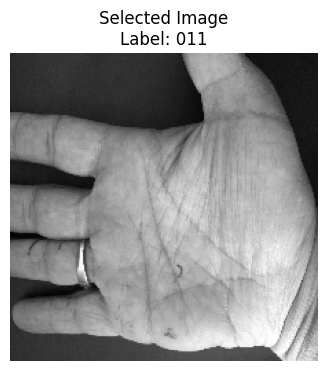

In [27]:
sample_img_path = image_paths[0]  # Change index if needed
sample_label = labels[0]

img = cv2.imread(sample_img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (224, 224)) if img is not None else None

if img is None:
    print(f"❌ Could not load image at: {sample_img_path}")
else:
    print(f"✅ Selected image → Label: {sample_label}, File: {sample_img_path}")
# Display the selected image before augmentation
plt.figure(figsize=(4, 4))
plt.imshow(img, cmap='gray')
plt.title(f"Selected Image\nLabel: {sample_label}")
plt.axis('off')
plt.show()

### **Define Augmentations**

In [31]:
    def rotate_image(img, angle):
        h, w = img.shape
        M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1)
        return cv2.warpAffine(img, M, (w, h))

    def adjust_brightness(img, factor):
        return cv2.convertScaleAbs(img, alpha=factor, beta=0)

    def zoom_image(img, zoom_factor):
        h, w = img.shape
        cx, cy = w//2, h//2
        rx, ry = int(w / (2 * zoom_factor)), int(h / (2 * zoom_factor))
        cropped = img[cy - ry:cy + ry, cx - rx:cx + rx]
        return cv2.resize(cropped, (w, h))

### **Apply Augmentations & Compute SSIM**

In [32]:
    augmentations = {
        "Rotation (+15°)": rotate_image(img, 15),
        "Brightness (×1.5)": adjust_brightness(img, 1.5),
        "Zoom (×1.2)": zoom_image(img, 1.2)
    }

    safe_threshold = 0.45
    results = []

    print("\n📊 SSIM Comparison and Safety Evaluation:\n")
    for aug_name, aug_img in augmentations.items():
        score = compare_ssim(img, aug_img)
        decision = "✅ Safe" if score >= safe_threshold else "❌ Risky"
        results.append((aug_name, score, decision))
        print(f"{aug_name:<20} → SSIM: {score:.4f} → {decision}")


📊 SSIM Comparison and Safety Evaluation:

Rotation (+15°)      → SSIM: 0.3167 → ❌ Risky
Brightness (×1.5)    → SSIM: 0.7747 → ✅ Safe
Zoom (×1.2)          → SSIM: 0.3861 → ❌ Risky


### **Visual Comparison Plot**

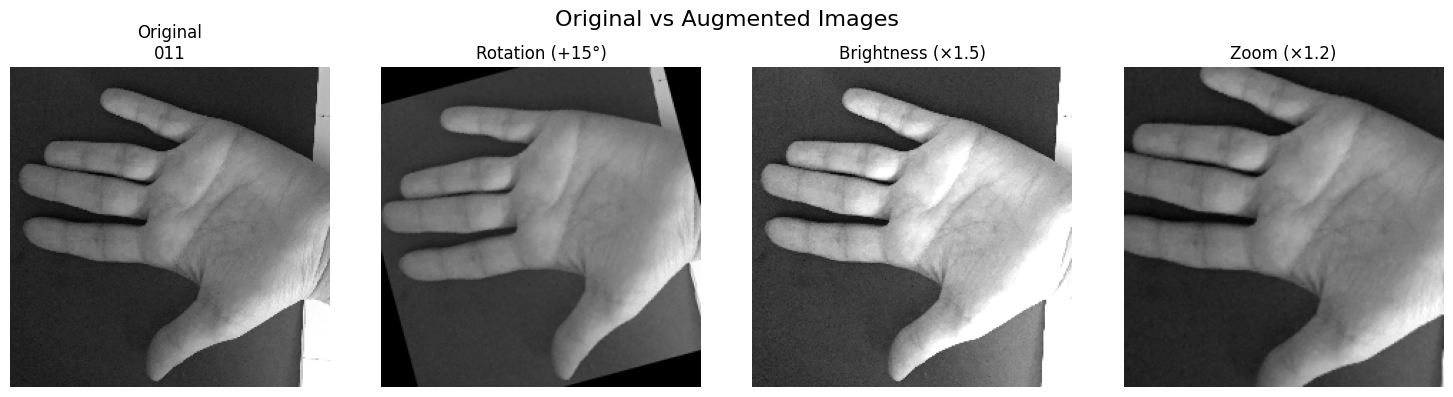

In [34]:
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 4, 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Original\n{sample_label}")
    plt.axis('off')

    for idx, (aug_name, aug_img) in enumerate(augmentations.items(), start=2):
        plt.subplot(1, 4, idx)
        plt.imshow(aug_img, cmap='gray')
        plt.title(aug_name)
        plt.axis('off')

    plt.suptitle("Original vs Augmented Images", fontsize=16)
    plt.tight_layout()
    plt.show()

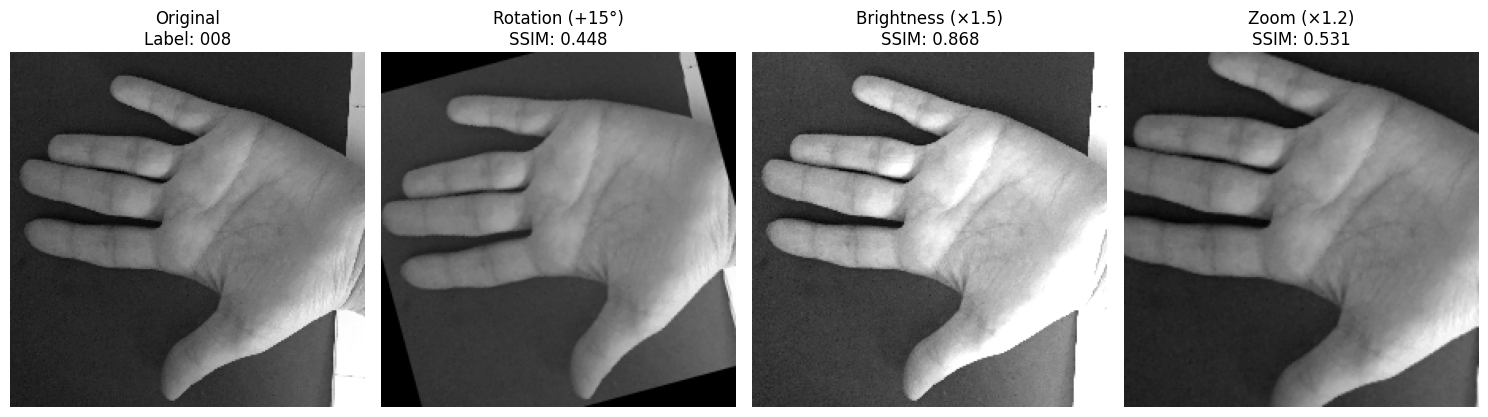

In [36]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title(f"Original\nLabel: {label}")
plt.axis('off')

for idx, (aug_name, aug_img) in enumerate(augmentations.items(), start=2):
    ssim_val = compare_ssim(img, aug_img)
    plt.subplot(1, 4, idx)
    plt.imshow(aug_img, cmap='gray')
    plt.title(f"{aug_name}\nSSIM: {ssim_val:.3f}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### **Checking Feasibility Functions on Multiple Images**

📊 SSIM Evaluation Table:

🔍 Image 1 → Label: 038, File: 038_S_L_20.JPG
  Rotation (+15°)      → SSIM: 0.4696 → Safe
  Brightness (×1.5)    → SSIM: 0.8539 → Safe
  Zoom (×1.2)          → SSIM: 0.5200 → Safe


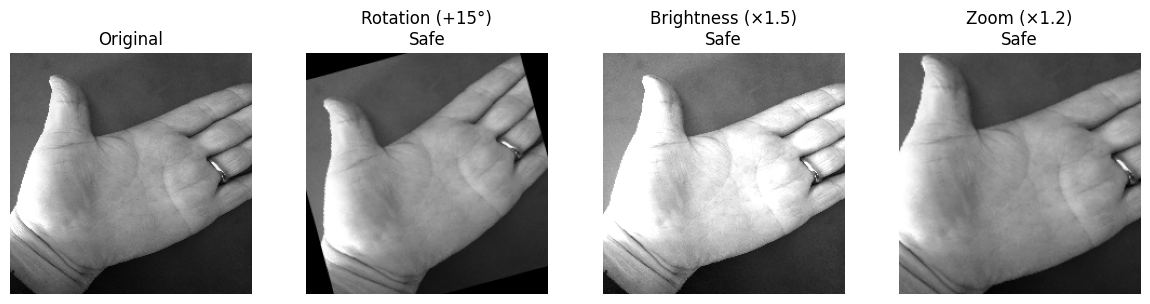


🔍 Image 2 → Label: 012, File: 012_F_L_31.JPG
  Rotation (+15°)      → SSIM: 0.4060 → Risky
  Brightness (×1.5)    → SSIM: 0.8391 → Safe
  Zoom (×1.2)          → SSIM: 0.5141 → Safe


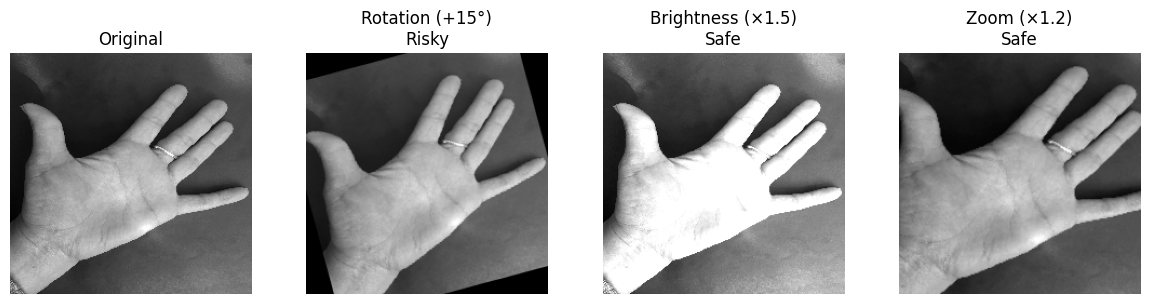


🔍 Image 3 → Label: 031, File: 031_F_L_39.JPG
  Rotation (+15°)      → SSIM: 0.4401 → Risky
  Brightness (×1.5)    → SSIM: 0.8427 → Safe
  Zoom (×1.2)          → SSIM: 0.5517 → Safe


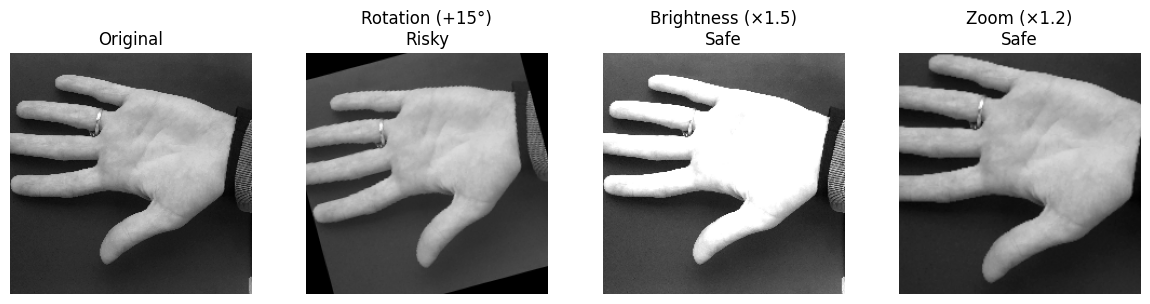


🔍 Image 4 → Label: 035, File: 035_F_L_31.JPG
  Rotation (+15°)      → SSIM: 0.3792 → Risky
  Brightness (×1.5)    → SSIM: 0.8484 → Safe
  Zoom (×1.2)          → SSIM: 0.4821 → Safe


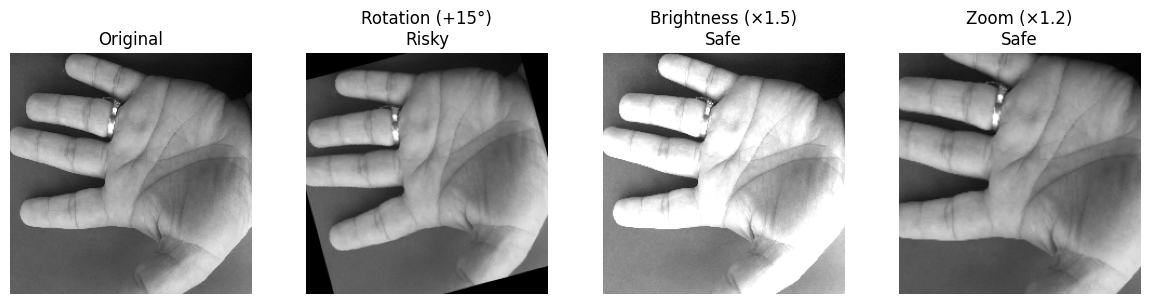


🔍 Image 5 → Label: 008, File: 008_F_L_39.JPG
  Rotation (+15°)      → SSIM: 0.4485 → Risky
  Brightness (×1.5)    → SSIM: 0.8684 → Safe
  Zoom (×1.2)          → SSIM: 0.5309 → Safe


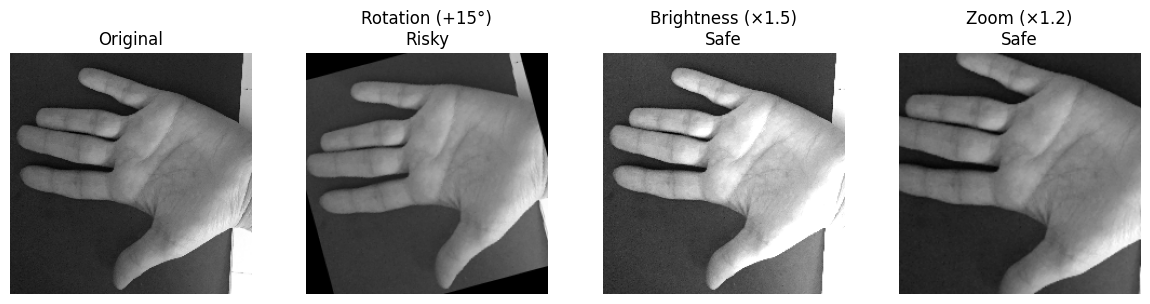

In [38]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as compare_ssim
import random

# Define your dataset root
data_dir = os.path.join('BMPD_Dataset', 'Birjand University Mobile Palmprint Database (BMPD)')

# Gather all image paths and labels
image_paths, labels = [], []
for root, _, files in os.walk(data_dir):
    for file in files:
        if file.lower().endswith('.jpg'):
            image_paths.append(os.path.join(root, file))
            labels.append(os.path.basename(root))

def rotate_image(img, angle):
    h, w = img.shape
    M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1)
    return cv2.warpAffine(img, M, (w, h))

def adjust_brightness(img, factor):
    return cv2.convertScaleAbs(img, alpha=factor, beta=0)

def zoom_image(img, zoom_factor):
    h, w = img.shape
    cx, cy = w//2, h//2
    rx, ry = int(w / (2 * zoom_factor)), int(h / (2 * zoom_factor))
    cropped = img[cy - ry:cy + ry, cx - rx:cx + rx]
    return cv2.resize(cropped, (w, h))

num_samples = 5
safe_threshold = 0.45
random.seed(42)

selected = random.sample(list(zip(image_paths, labels)), num_samples)
print("📊 SSIM Evaluation Table:\n")

for idx, (img_path, label) in enumerate(selected):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None: continue
    img = cv2.resize(img, (224, 224))

    augmentations = {
        "Rotation (+15°)": rotate_image(img, 15),
        "Brightness (×1.5)": adjust_brightness(img, 1.5),
        "Zoom (×1.2)": zoom_image(img, 1.2)
    }

    print(f"🔍 Image {idx+1} → Label: {label}, File: {os.path.basename(img_path)}")
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 4, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    for j, (aug_name, aug_img) in enumerate(augmentations.items(), start=2):
        score = compare_ssim(img, aug_img)
        decision = "Safe" if score >= safe_threshold else "Risky"
        print(f"  {aug_name:<20} → SSIM: {score:.4f} → {decision}")

        plt.subplot(1, 4, j)
        plt.imshow(aug_img, cmap='gray')
        plt.title(f"{aug_name}\n{decision}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()
    print()
    ssim_data = {"Rotation": [], "Brightness": [], "Zoom": []}

for path in image_paths:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue
    img = cv2.resize(img, (224, 224))

    aug1 = rotate_image(img, 15)
    aug2 = adjust_brightness(img, 1.5)
    aug3 = zoom_image(img, 1.2)

    ssim_data["Rotation"].append(compare_ssim(img, aug1))
    ssim_data["Brightness"].append(compare_ssim(img, aug2))
    ssim_data["Zoom"].append(compare_ssim(img, aug3))

### **Plot Average SSIM per Augmentation**

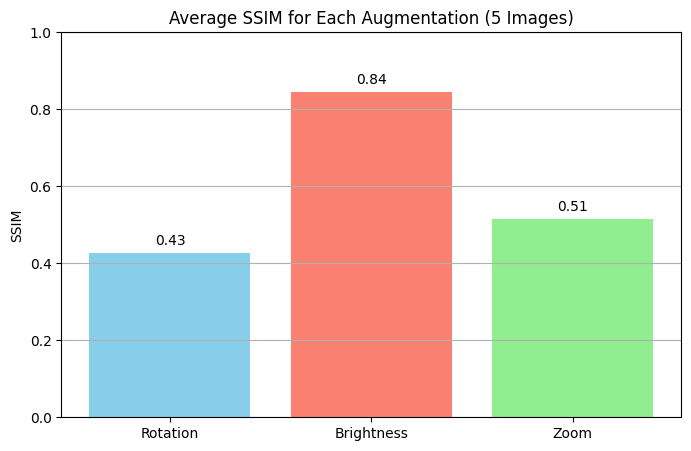

In [40]:
labels = list(ssim_data.keys())
avg_ssim = [np.mean(ssim_data[k]) for k in labels]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, avg_ssim, color=['skyblue', 'salmon', 'lightgreen'])
plt.ylim(0, 1)
plt.title("Average SSIM for Each Augmentation (5 Images)")
for bar, ssim in zip(bars, avg_ssim):
    plt.text(bar.get_x() + bar.get_width()/2, ssim + 0.02, f"{ssim:.2f}", ha='center')
plt.ylabel("SSIM")
plt.grid(axis='y')
plt.show()

### **Select sample images**


Selected Images:

1. BMPD_Dataset/Birjand University Mobile Palmprint Database (BMPD)/001/001_F_R_3.JPG
2. BMPD_Dataset/Birjand University Mobile Palmprint Database (BMPD)/002/002_F_L_34.JPG
3. BMPD_Dataset/Birjand University Mobile Palmprint Database (BMPD)/003/003_F_L_39.JPG


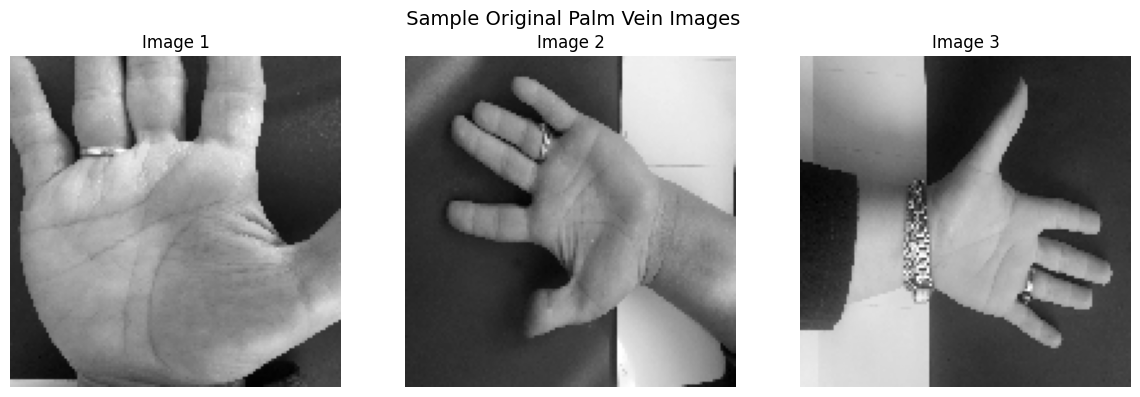

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import random

# Dataset path
data_dir = os.path.join("BMPD_Dataset", "Birjand University Mobile Palmprint Database (BMPD)")

# Select 3 sample images from 3 users
sample_paths = []
user_ids = sorted(os.listdir(data_dir))[:3]

for user in user_ids:
    user_path = os.path.join(data_dir, user)
    if os.path.isdir(user_path):
        img_file = random.choice([
            f for f in os.listdir(user_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))
        ])
        sample_paths.append(os.path.join(user_path, img_file))

# Print file paths
print("Selected Images:\n")
for i, path in enumerate(sample_paths):
    print(f"{i+1}. {path}")

# Display images
plt.figure(figsize=(12, 4))
for i, path in enumerate(sample_paths):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))
    plt.subplot(1, len(sample_paths), i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Image {i+1}")
    plt.axis('off')

plt.suptitle(" Sample Original Palm Vein Images", fontsize=14)
plt.tight_layout()
plt.show()


### **Apply horizontal/vertical flips & contrast**

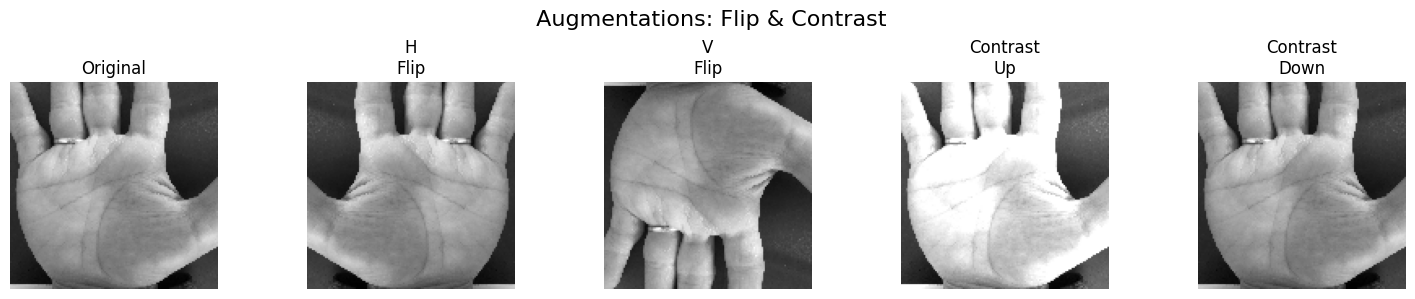

In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

# --- Your augmentation function ---
def augment_image(image):
    return {
        "original": image,
        "h_flip": cv2.flip(image, 1),
        "v_flip": cv2.flip(image, 0),
        "contrast_up": cv2.convertScaleAbs(image, alpha=1.5, beta=0),
        "contrast_down": cv2.convertScaleAbs(image, alpha=0.5, beta=0),
    }

# --- Load and resize one sample image ---
img_path = sample_paths[0]  # Picked from earlier selection
original = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
original = cv2.resize(original, (128, 128))

# --- Apply augmentations ---
augmented_images = augment_image(original)

# --- Display all augmented images ---
plt.figure(figsize=(15, 3))
for i, (name, img) in enumerate(augmented_images.items()):
    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(name.replace('_', '\n').title())
    plt.axis('off')

plt.suptitle(" Augmentations: Flip & Contrast", fontsize=16)
plt.tight_layout()
plt.show()


### **Show Before/After & Compute SSIM**


 Sample 1: 001_F_R_3.JPG


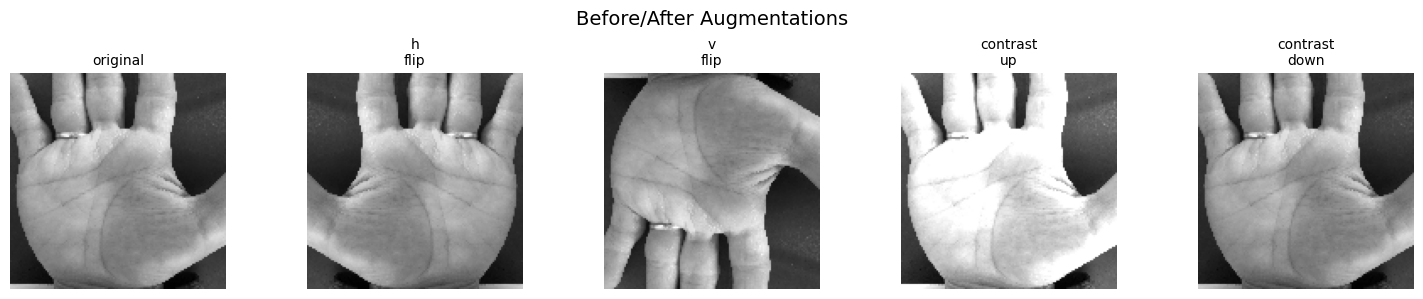

 SSIM Scores (compared to original):
 - h_flip          ➤ SSIM: 0.2191 →  Distorts Identity
 - v_flip          ➤ SSIM: 0.2434 →  Distorts Identity
 - contrast_up     ➤ SSIM: 0.8095 →  Distorts Identity
 - contrast_down   ➤ SSIM: 0.7030 →  Distorts Identity

 Sample 2: 002_F_L_34.JPG


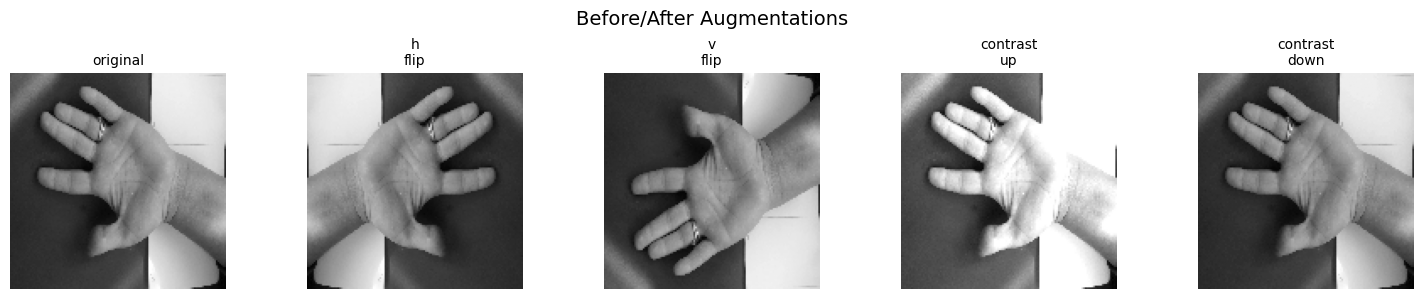

 SSIM Scores (compared to original):
 - h_flip          ➤ SSIM: 0.2260 →  Distorts Identity
 - v_flip          ➤ SSIM: 0.3292 →  Distorts Identity
 - contrast_up     ➤ SSIM: 0.8526 → Safe
 - contrast_down   ➤ SSIM: 0.7166 →  Distorts Identity

 Sample 3: 003_F_L_39.JPG


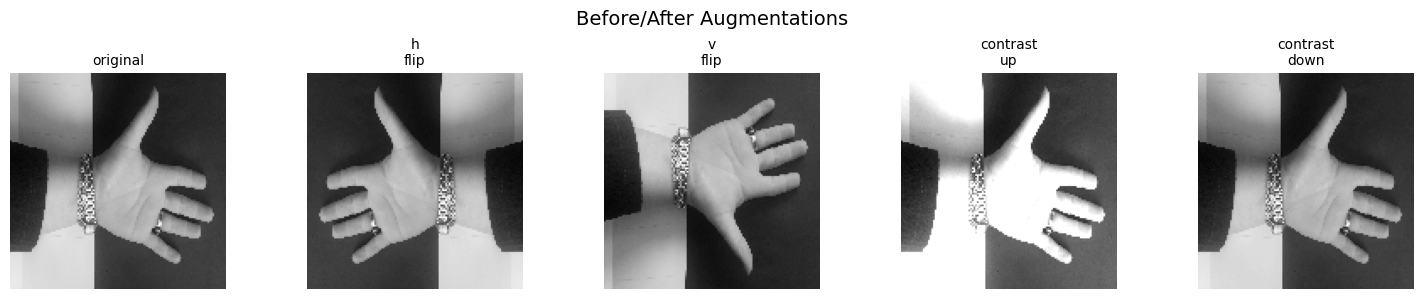

 SSIM Scores (compared to original):
 - h_flip          ➤ SSIM: 0.2907 →  Distorts Identity
 - v_flip          ➤ SSIM: 0.3890 →  Distorts Identity
 - contrast_up     ➤ SSIM: 0.8605 → Safe
 - contrast_down   ➤ SSIM: 0.7240 →  Distorts Identity


In [ ]:
for idx, path in enumerate(sample_paths):
    original = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    original = cv2.resize(original, (128, 128))

    aug_dict = augment_image(original)

    print(f"\n Sample {idx+1}: {os.path.basename(path)}")
    plt.figure(figsize=(15, 3))

    for i, (name, img) in enumerate(aug_dict.items()):
        plt.subplot(1, 5, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(name.replace('_', '\n'), fontsize=10)
        plt.axis('off')
    plt.suptitle("Before/After Augmentations", fontsize=14)
    plt.tight_layout()
    plt.show()

    # Compute SSIM
    print(" SSIM Scores (compared to original):")
    for name, aug_img in aug_dict.items():
        if name != "original":
            score = ssim(original, aug_img)
            status = "Safe" if score > 0.85 else " Distorts Identity"
            print(f" - {name:15s} ➤ SSIM: {score:.4f} → {status}")


### **Flag augmentations that distort identity**

In [ ]:
from skimage.metrics import structural_similarity as ssim
import cv2
import matplotlib.pyplot as plt

# Threshold to flag distortion
ssim_threshold = 0.85

# Load one sample image
img_path = sample_paths[0]
original = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
original = cv2.resize(original, (128, 128))

# Augment image
augmented_images = augment_image(original)

# Compute and flag SSIM
print(" Identity Preservation Check (SSIM with Original):\n")

flagged = {}

for name, aug_img in augmented_images.items():
    if name == "original":
        continue
    score = ssim(original, aug_img)
    status = "Safe" if score >= ssim_threshold else "❌ Unsafe"
    flagged[name] = (score, status)
    print(f"{name:15s} ➤ SSIM: {score:.4f} → {status}")


 Identity Preservation Check (SSIM with Original):

h_flip          ➤ SSIM: 0.2191 → ❌ Unsafe
v_flip          ➤ SSIM: 0.2434 → ❌ Unsafe
contrast_up     ➤ SSIM: 0.8095 → ❌ Unsafe
contrast_down   ➤ SSIM: 0.7030 → ❌ Unsafe


### **Visualize how much augmentations distort identity**

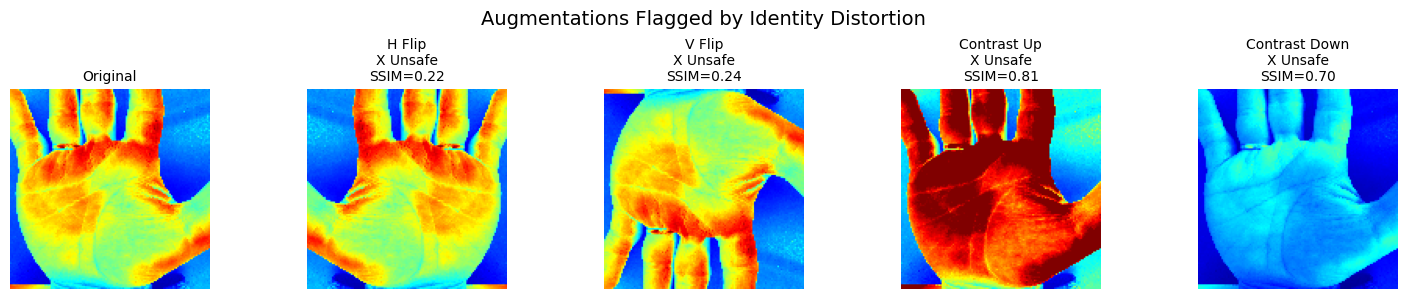

In [ ]:
# Visual output with SSIM status
plt.figure(figsize=(15, 3))
for i, (name, img) in enumerate(augmented_images.items()):
    color_img = cv2.applyColorMap(img, cv2.COLORMAP_JET)
    plt.subplot(1, 5, i + 1)
    plt.imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB))

    if name == "original":
        title = "Original"
    else:
        score, status = flagged[name]
        status_text = "✓ Safe" if score >= ssim_threshold else "X Unsafe"
        title = f"{name.replace('_', ' ').title()}\n{status_text}\nSSIM={score:.2f}"

    plt.title(title, fontsize=10)
    plt.axis('off')

plt.suptitle("Augmentations Flagged by Identity Distortion", fontsize=14)
plt.tight_layout()
plt.show()
